![Color-Zillow-Logo](https://user-images.githubusercontent.com/80718476/123677764-22803700-d80b-11eb-9acc-53ef29324efb.jpeg)


# Zillow Cluster Project

<hr style="border-top: 5px groove #1277e1; margin-top: 1px; margin-bottom: 1px"></hr>


## Author:

### Linh Quach

# Date:

### June 28, 2021

# This Issue:
 - How do we better predict logerror?
 
# Project goals:
 - Find drivers of logerror 
 - Construct a model that helps us better predict logerror

# The data science pipeline process:
- Acquire the data
- Prepare and clean data
- Explore
- Model & Evaluate
- Recommendataions

# Executive Summary 
<b>The following are key takeways:</b>

  -Log_error does not correlate well with any one feature
 
  - All models performed relatively the same but the Polynomial Regression Model with the clusters performed the best
    - RMSE: 0.045734
    - Outperformed baseline by 0.007 %
  
  - The models I created were a  Linear Regression, Lasso Lars, and Polynomial Regression Model. All of the models outperformed the baseline. I chose was the Polynomial Regression Model as my best model with a 0.007 % improvement for predicting features of Logerror.
  
  -  The Polynomial Regression Model outperformed my baseline score by 0.007 % thus it has value.

# Acquire

<b> We will start by importing the necessary libraries </b>

In [1]:
import pandas as pd
import numpy as np
import os
from scipy import stats
from scipy.stats import norm
import scipy.stats as stats
import math
# acquire
from env import host, user, password
from pydataset import data

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

#sklearn
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures

#Docs
import acquire
import prepare
import explore


- acquire for zillow data by using a function created in the acquire.py file

In [2]:
zillow_df= acquire.get_zillow_data()

<I> Let's verify we imported the correct data. </I>

- We will look at the the first 5 values

In [3]:
#Looking at first 5 values
zillow_df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,buildingclasstypeid,buildingclassdesc,heatingorsystemtypeid,heatingorsystemdesc,buildingclasstypeid,buildingclassdesc,storytypeid,storydesc,typeconstructiontypeid,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,None,NaN,3.5,...,None,None,NaN,None,None,None,NaN,None,NaN,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,None,NaN,1.0,...,None,None,NaN,None,None,None,NaN,None,NaN,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,None,NaN,2.0,...,None,None,NaN,None,None,None,NaN,None,NaN,None
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,None,8.0,3.0,...,None,None,2.0,Central,None,None,NaN,None,NaN,None
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,None,9.0,3.0,...,None,None,2.0,Central,None,None,NaN,None,NaN,None


- We will analyze the shape (amount of rows and columns).

In [4]:
#52,953 rows and 78 columns
zillow_df.shape

(52953, 78)

- We will get a quick overview of statistics for columns

In [5]:
# Displaying readable summary statistics for numeric columns.
zillow_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,52953.0,1.497098e+06,8.594523e+05,3.490000e+02,7.575020e+05,1.500314e+06,2.241055e+06,2.982270e+06
parcelid,52953.0,1.302532e+07,3.352247e+06,1.071186e+07,1.151646e+07,1.259350e+07,1.414307e+07,1.676878e+08
airconditioningtypeid,13650.0,2.436777e+00,3.844722e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,70.0,7.100000e+00,2.665670e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,50.0,6.797200e+02,6.897035e+02,3.800000e+01,2.730000e+02,5.150000e+02,7.965000e+02,3.560000e+03
bathroomcnt,52953.0,2.294752e+00,1.022623e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,52953.0,3.290692e+00,9.573980e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.400000e+01
buildingqualitytypeid,33807.0,6.266335e+00,1.715852e+00,1.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
calculatedbathnbr,52748.0,2.302988e+00,1.015186e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
decktypeid,415.0,6.600000e+01,0.000000e+00,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01


- The datatypes are listed below using the .info function.

In [6]:
# Running .info() to see datatypes

zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52953 entries, 0 to 52952
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52953 non-null  int64  
 1   parcelid                      52953 non-null  int64  
 2   airconditioningtypeid         13650 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   52953 non-null  float64
 6   bedroomcnt                    52953 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         33807 non-null  float64
 9   calculatedbathnbr             52748 non-null  float64
 10  decktypeid                    415 non-null    float64
 11  finishedfloor1squarefeet      4724 non-null   float64
 12  calculatedfinishedsquarefeet  52822 non-null  float64
 13  f

- Looking at the amount of nulls we will need to drop or fill.

In [7]:
#Looking at how many nulls in each column
zillow_df.isnull().sum()

id                                  0
parcelid                            0
airconditioningtypeid           39303
architecturalstyletypeid        52883
basementsqft                    52903
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             52953
buildingqualitytypeid           19146
calculatedbathnbr                 205
decktypeid                      52538
finishedfloor1squarefeet        48229
calculatedfinishedsquarefeet      131
finishedsquarefeet12              339
finishedsquarefeet13            52911
finishedsquarefeet15            52953
finishedsquarefeet50            48229
finishedsquarefeet6             52787
fips                                0
fireplacecnt                    45541
fullbathcnt                       205
garagecarcnt                    34562
garagetotalsqft                 34562
hashottuborspa                  51438
heatingorsystemtypeid           19002
latitude                            0
longitude   

- Looking to see if we have duplicate columns

In [8]:
# looking at duplicates by unique values
zillow_df.duplicated().value_counts()

False    52953
dtype: int64

- We see we have duplicated parcelid columns

In [9]:
# Count duplicate on a parcelid column
zillow_df['parcelid'].duplicated().sum()

125

In [10]:
#seeing if there is duplicate parcelid
zillow_df['parcelid']

,parcelid,parcelid
0,14297519,14297519
1,17052889,17052889
2,14186244,14186244
3,12177905,12177905
4,12095076,12095076
...,...,...
52948,12412492,12412492
52949,11000655,11000655
52950,17239384,17239384
52951,12773139,12773139


## Acquire Findings:
- Great amount of nulls need to filled or dropped
- need to drop duplicates by parcelid (this is a unique identifier)
- Most of the datatypes look good, no changes needed
- The columns with object datatype will not be used or will be dropped
- drop columns that are unique identifiers because it won't be useful for exploration or modeling
- Features to consider binning: logerror, acres, squarefeet, dollar per square foot-structure, and dollar per square foot-land

# Prepare

- We drop duplicate parcelid column

In [11]:
# Drop duplicate columns
zillow_df= zillow_df.loc[:, ~zillow_df.columns.duplicated()]

In [12]:
#drop duplicated by unique identifier parcelid column
zillow_df.drop_duplicates(subset=['parcelid'], inplace= True)

In [13]:
#Looking at all columns
zillow_df.columns.tolist()

['id',
 'parcelid',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',


In [14]:
#verify there are not two parcelid columns
zillow_df['parcelid']

0        14297519
1        17052889
2        14186244
3        12177905
4        12095076
           ...   
52948    12412492
52949    11000655
52950    17239384
52951    12773139
52952    12826780
Name: parcelid, Length: 52828, dtype: int64

- Looking at percentage of nulls with miss_dup_values function from prepare.py file BEFORE dropping nulls

In [15]:
#Using function from prepare file to see how percentage of nulls in each column
#Looking at this will help us choose a threshold for columns and rows to drop
prepare.miss_dup_values(zillow_df)

Your selected dataframe has 68 columns.
There are 52 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
buildingclasstypeid,52828,100.0
buildingclassdesc,52828,100.0
finishedsquarefeet15,52828,100.0
finishedsquarefeet13,52787,99.9
basementsqft,52778,99.9
storydesc,52778,99.9
storytypeid,52778,99.9
yardbuildingsqft26,52763,99.9
architecturalstyletypeid,52758,99.9
architecturalstyledesc,52758,99.9


- Create more binned columns using create features function from prepare.py file

In [16]:
# Using create feature function to create more features
zillow_df= prepare.create_features(zillow_df)

- Using handle_missing_values function to drop any column/row with 90 % of nulls or more

In [17]:
#Use function to handling nulls (drops any column and row with 90% or more nulls)
zillow_df= prepare.handle_missing_values(zillow_df, prop_required_column = .9, prop_required_row = .9)

In [18]:
#Looking at shape after dropping columns
zillow_df.shape

(52292, 40)

In [19]:
#Looking at how many nulls after initial drop
zillow_df.isnull().sum()

id                                0
parcelid                          0
bathroomcnt                       0
bedroomcnt                        0
calculatedbathnbr                64
calculatedfinishedsquarefeet      0
finishedsquarefeet12            196
fips                              0
fullbathcnt                      64
latitude                          0
longitude                         0
lotsizesquarefeet                 0
propertycountylandusecode         0
propertylandusetypeid             0
rawcensustractandblock            0
regionidcity                    981
regionidcounty                    0
regionidzip                       7
roomcnt                           0
yearbuilt                        27
structuretaxvaluedollarcnt       57
taxvaluedollarcnt                 0
assessmentyear                    0
landtaxvaluedollarcnt             0
taxamount                         3
censustractandblock              54
logerror                          0
transactiondate             

- Looking at percentage of nulls with miss_dup_values function from prepare.py file AFTER dropping nulls

In [20]:
# looking at percentage of null values after initial drop
prepare.miss_dup_values(zillow_df)

Your selected dataframe has 40 columns.
There are 17 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
regionidcity,981,1.9
finishedsquarefeet12,196,0.4
calculatedbathnbr,64,0.1
fullbathcnt,64,0.1
structure_dollar_sqft_bin,58,0.1
structure_dollar_per_sqft,57,0.1
structuretaxvaluedollarcnt,57,0.1
censustractandblock,54,0.1
bath_bed_ratio,33,0.1
age,27,0.1


In [21]:
#Drop any remaining nulls
zillow_df= zillow_df.dropna()

In [22]:
#Looking at number of rows and columns after dropping remaining nulls
zillow_df.shape

(50940, 40)

In [23]:
#Looking at datatypes after all nulls have been dropped
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50940 entries, 0 to 52952
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            50940 non-null  int64  
 1   parcelid                      50940 non-null  int64  
 2   bathroomcnt                   50940 non-null  float64
 3   bedroomcnt                    50940 non-null  float64
 4   calculatedbathnbr             50940 non-null  float64
 5   calculatedfinishedsquarefeet  50940 non-null  float64
 6   finishedsquarefeet12          50940 non-null  float64
 7   fips                          50940 non-null  float64
 8   fullbathcnt                   50940 non-null  float64
 9   latitude                      50940 non-null  float64
 10  longitude                     50940 non-null  float64
 11  lotsizesquarefeet             50940 non-null  float64
 12  propertycountylandusecode     50940 non-null  object 
 13  p

In [24]:
#Drop unique identifiers
cols_drop= ['id', 'parcelid', 'propertylandusetypeid', 'propertycountylandusecode',
            'rawcensustractandblock', 'regionidcity', 'regionidcounty', 
            'regionidzip', 'censustractandblock', 'transactiondate', 'propertylandusedesc', 'assessmentyear']


zillow_df= zillow_df.drop(columns= cols_drop)

In [25]:
# Verify columns were dropped
zillow_df.columns.tolist()

['bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror',
 'age',
 'age_bin',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'structure_dollar_per_sqft',
 'structure_dollar_sqft_bin',
 'land_dollar_per_sqft',
 'lot_dollar_sqft_bin',
 'bath_bed_ratio']

In [26]:
#Looking at dataframe after dropping unique identifier columns
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50940 entries, 0 to 52952
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   50940 non-null  float64
 1   bedroomcnt                    50940 non-null  float64
 2   calculatedbathnbr             50940 non-null  float64
 3   calculatedfinishedsquarefeet  50940 non-null  float64
 4   finishedsquarefeet12          50940 non-null  float64
 5   fips                          50940 non-null  float64
 6   fullbathcnt                   50940 non-null  float64
 7   latitude                      50940 non-null  float64
 8   longitude                     50940 non-null  float64
 9   lotsizesquarefeet             50940 non-null  float64
 10  roomcnt                       50940 non-null  float64
 11  yearbuilt                     50940 non-null  float64
 12  structuretaxvaluedollarcnt    50940 non-null  float64
 13  t

In [27]:
#Creating box_plot_list for boxplots (had to exclude)
box_plot_list= zillow_df[['bathroomcnt','bedroomcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12','fips', 
                         'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 
                         'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 
                          'taxamount', 'logerror', 'age', 'age_bin', 'taxrate', 'acres', 'acres_bin', 'sqft_bin', 
                          'structure_dollar_per_sqft','structure_dollar_sqft_bin', 'land_dollar_per_sqft', 'lot_dollar_sqft_bin', 
                         'bath_bed_ratio' ]]

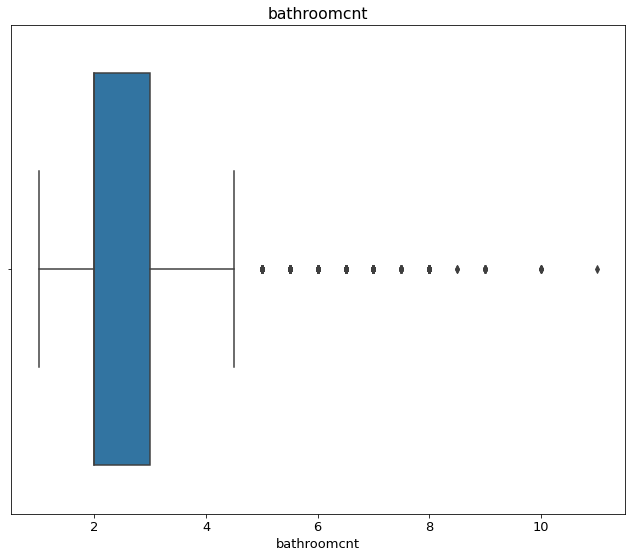

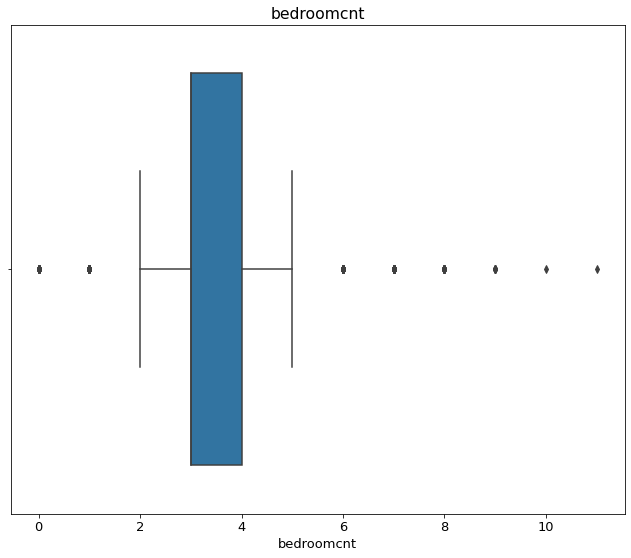

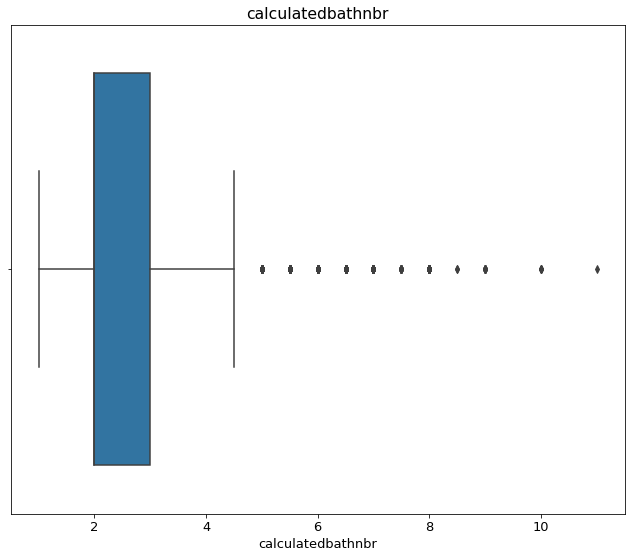

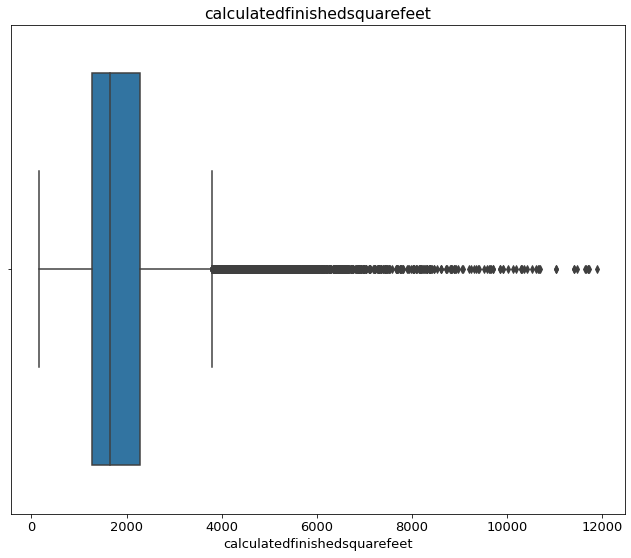

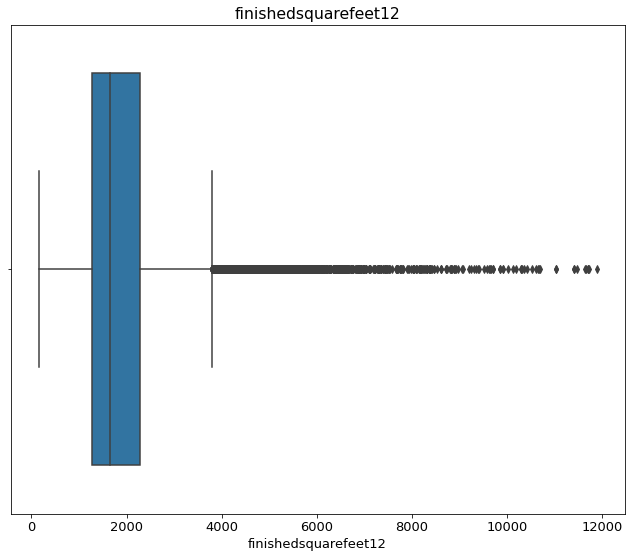

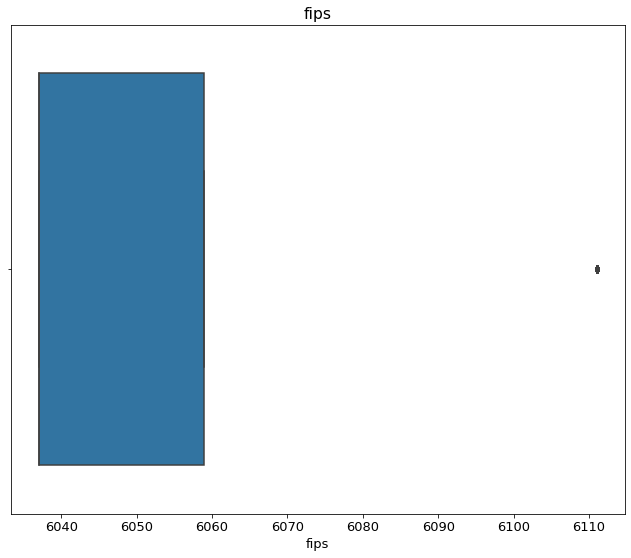

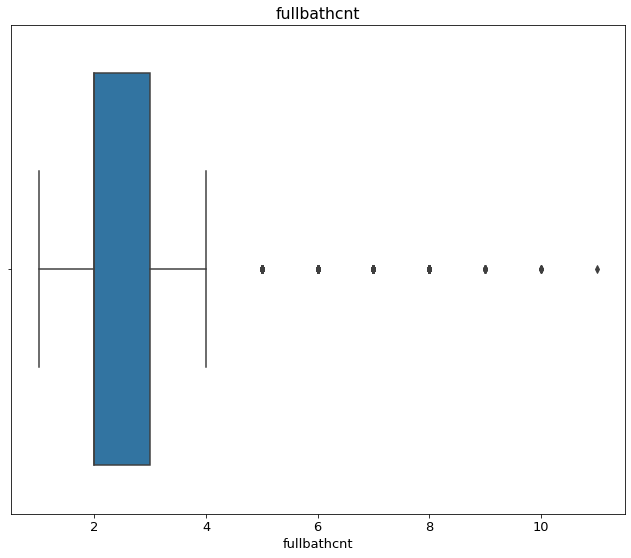

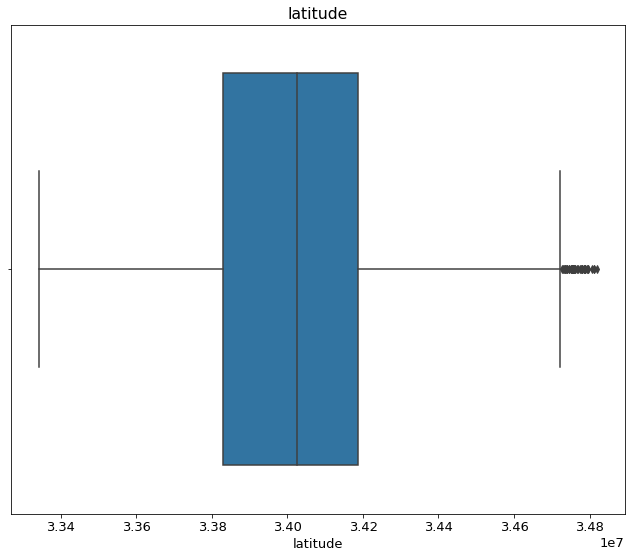

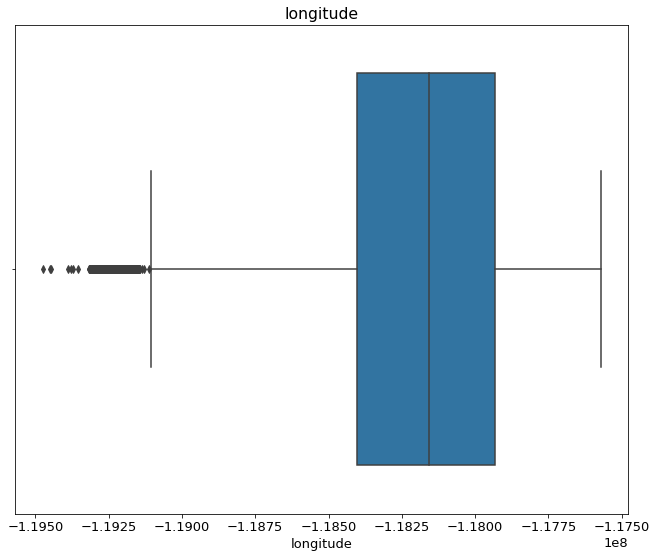

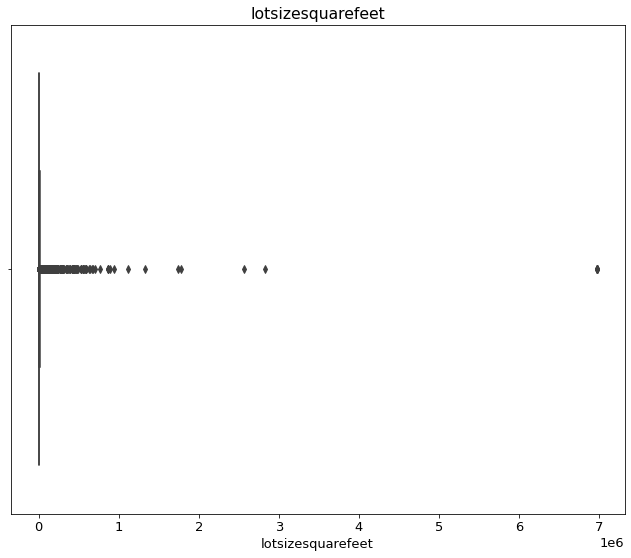

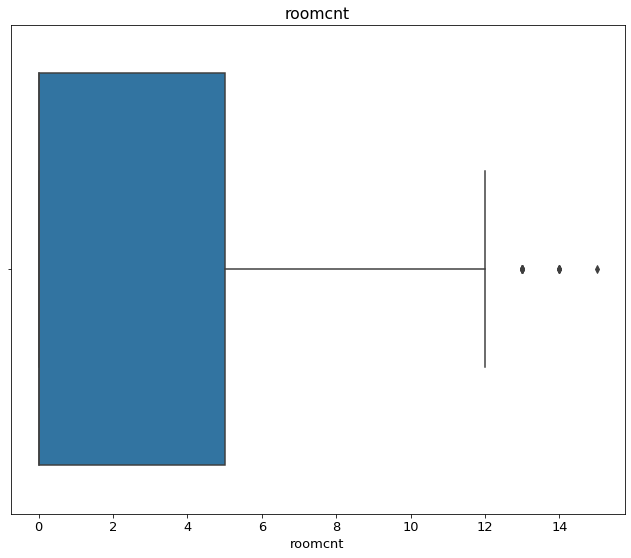

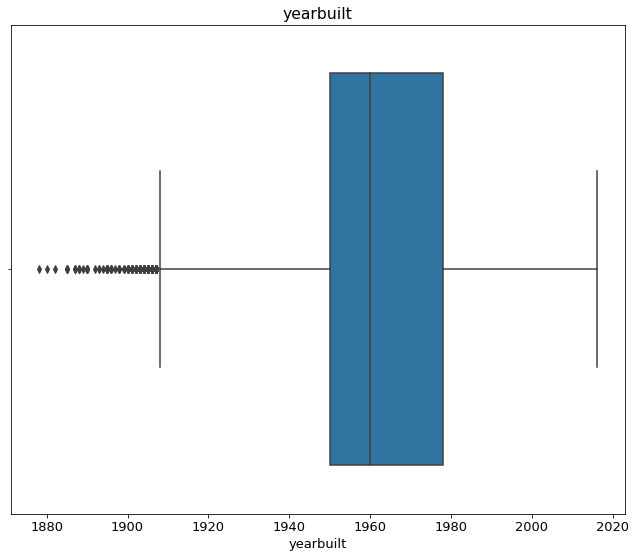

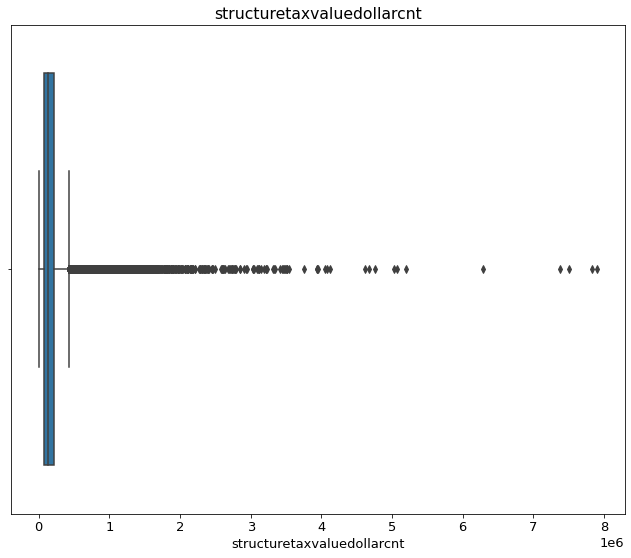

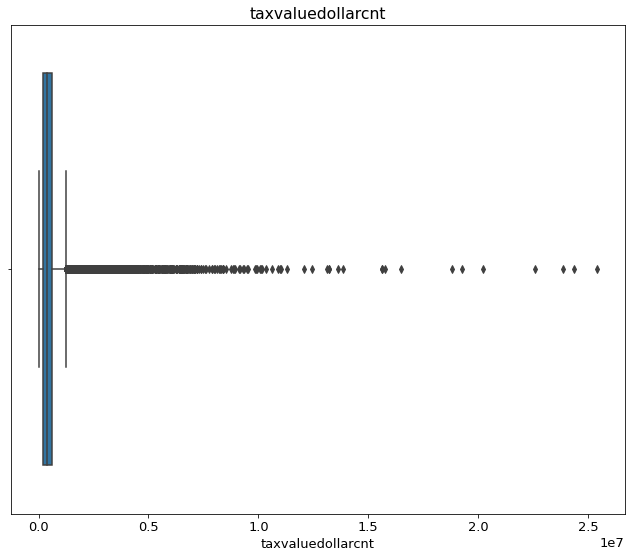

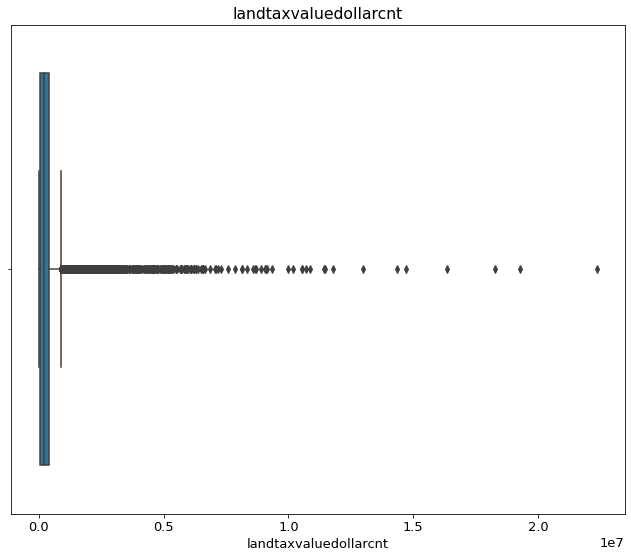

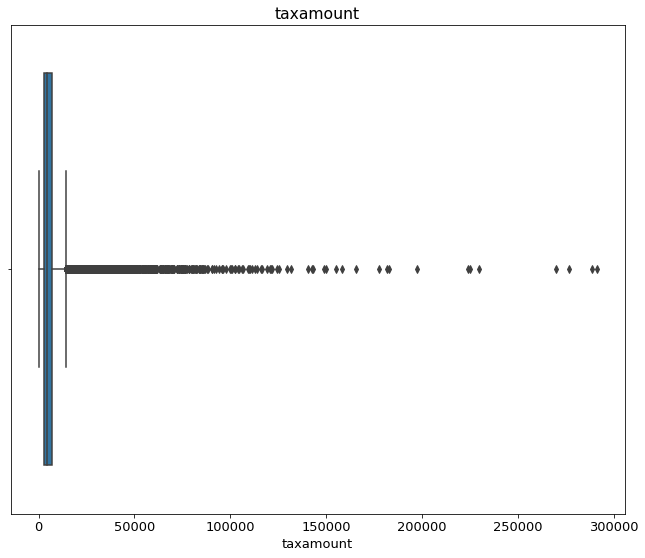

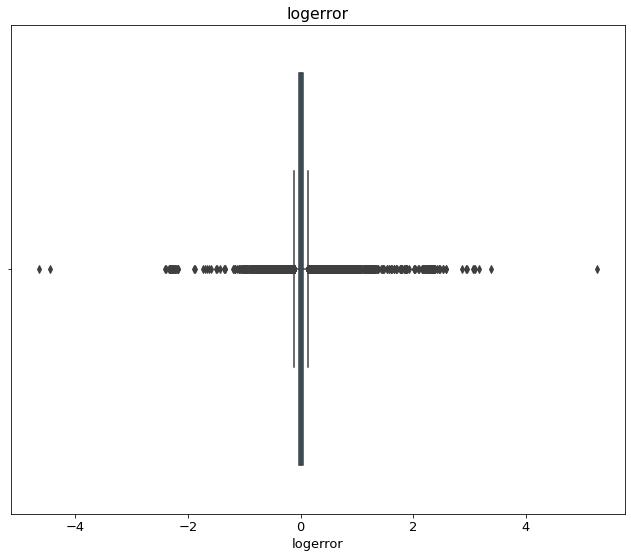

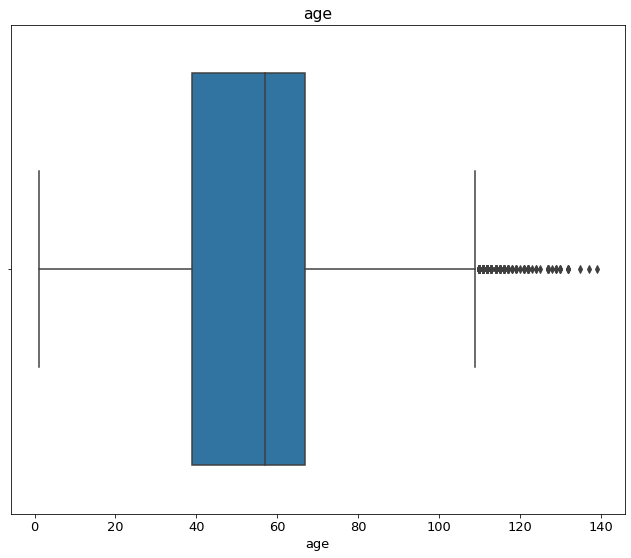

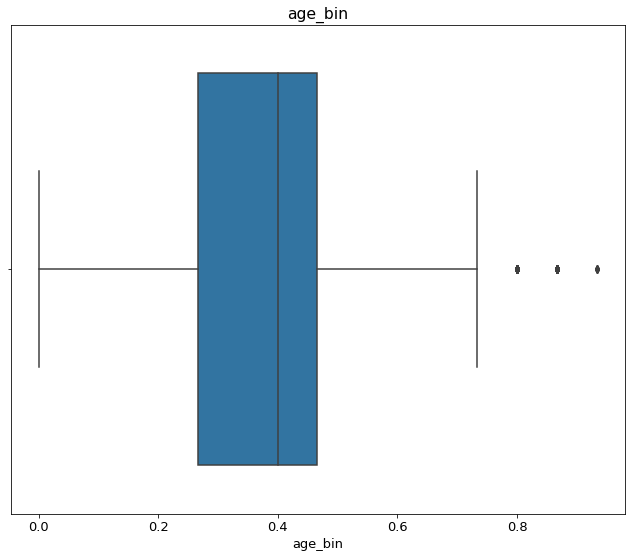

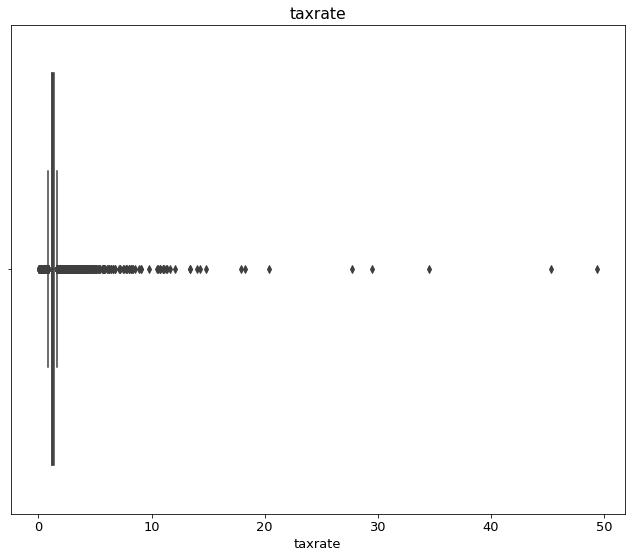

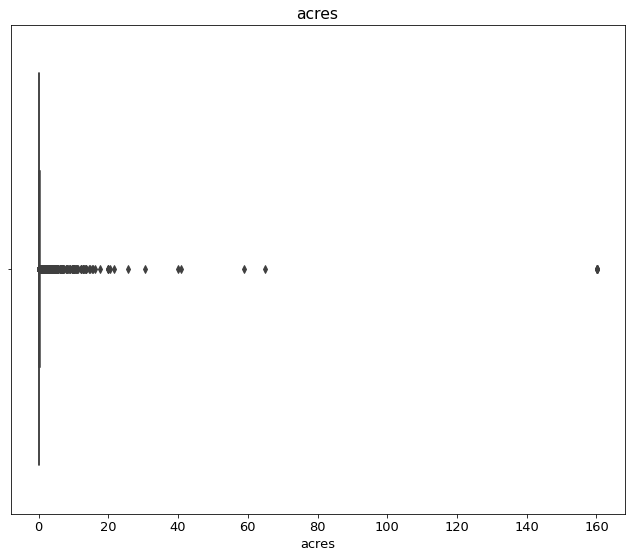

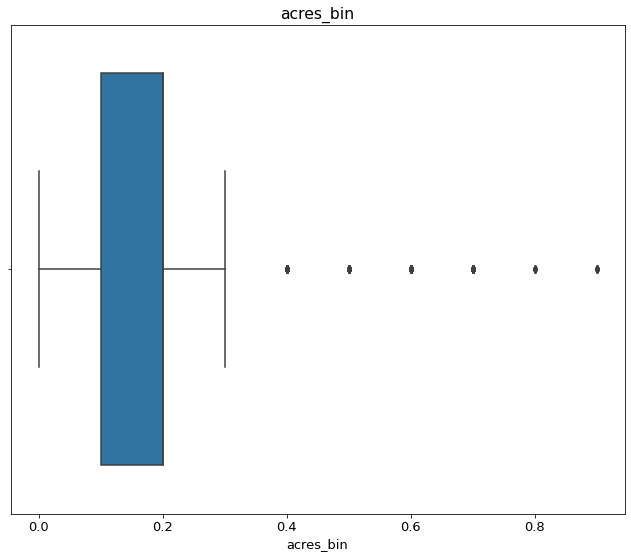

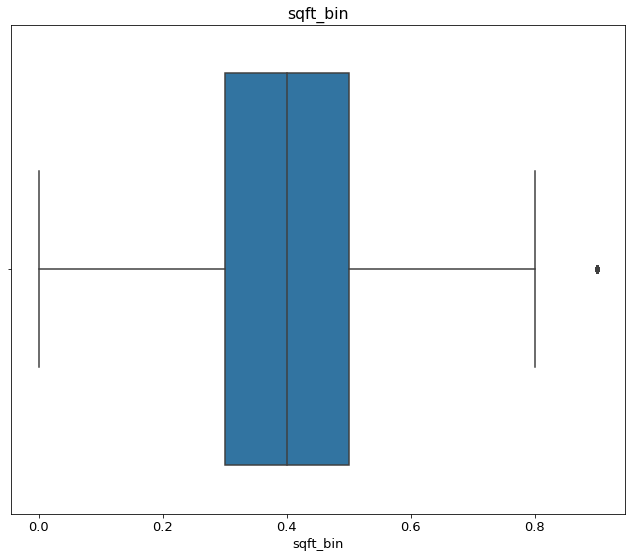

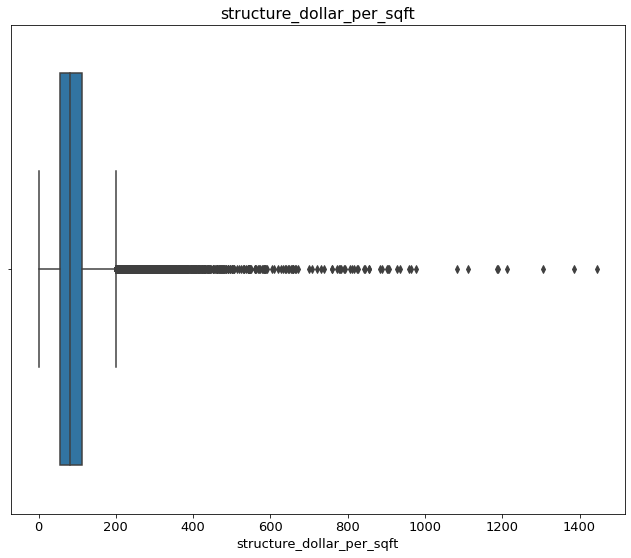

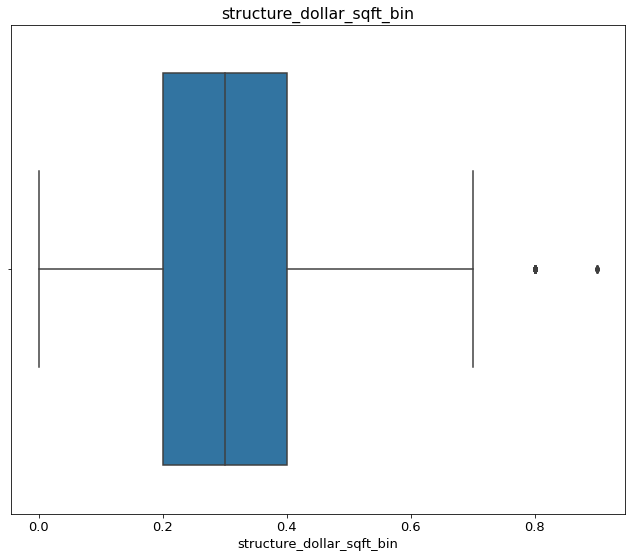

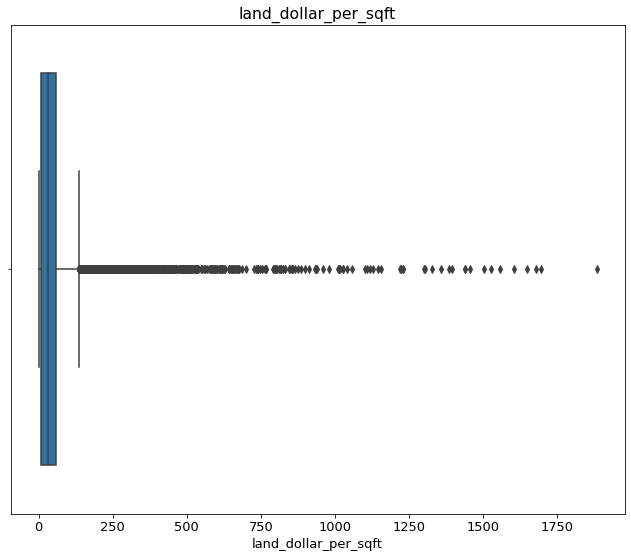

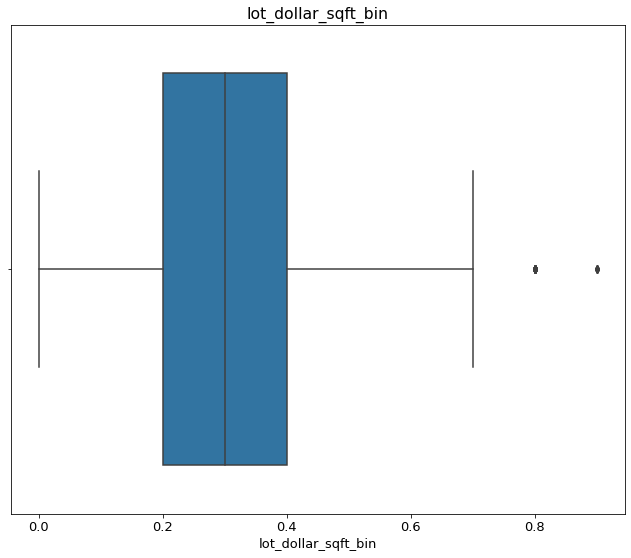

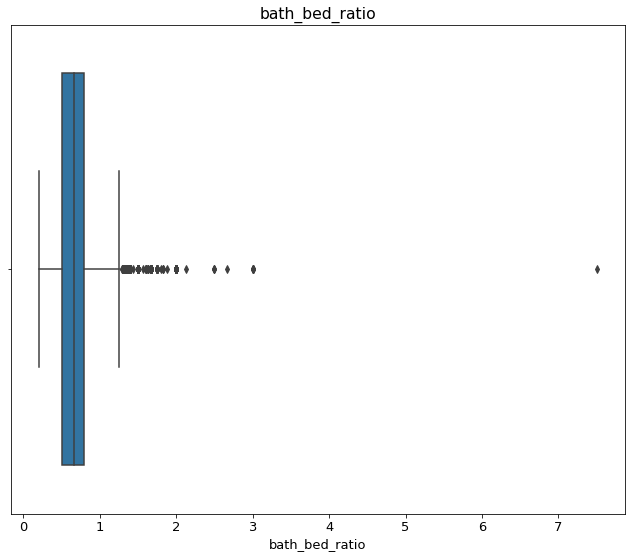

In [28]:
#Looking at boxplots before outliers are dropped
for col in box_plot_list:
    sns.boxplot(zillow_df[col])
    plt.title(col)
    plt.show()

### Boxplots (features used) before dropping outliers

In [29]:
#Creating box_plot_list for boxplots that I used
box_plot_list_2= zillow_df[['bedroomcnt', 'calculatedfinishedsquarefeet',  'fips',
                         'fullbathcnt', 'latitude', 'longitude' ]]

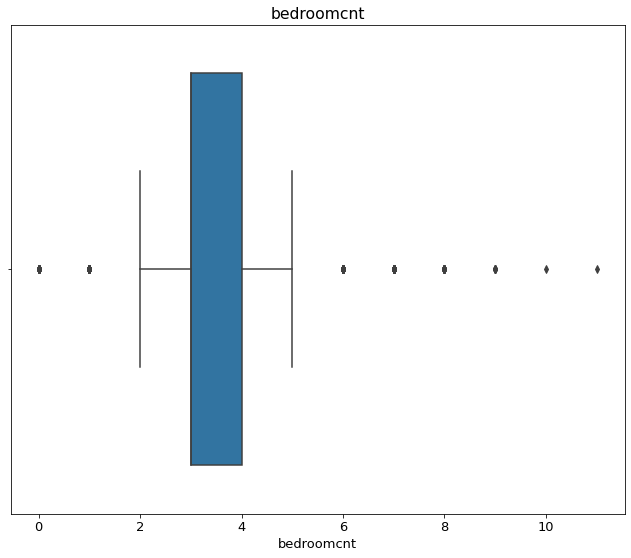

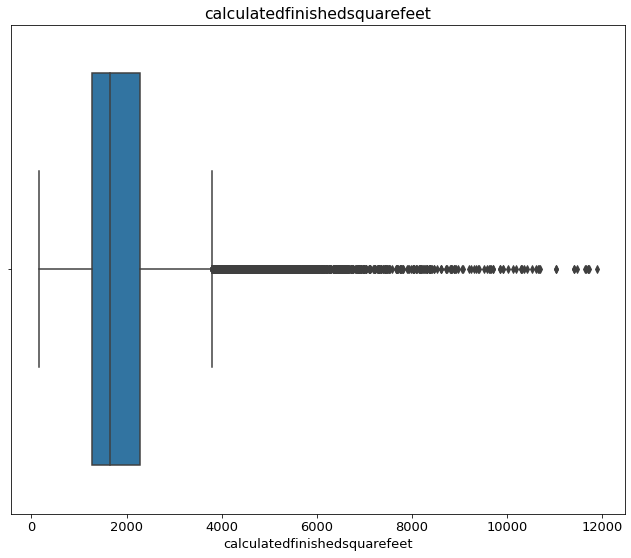

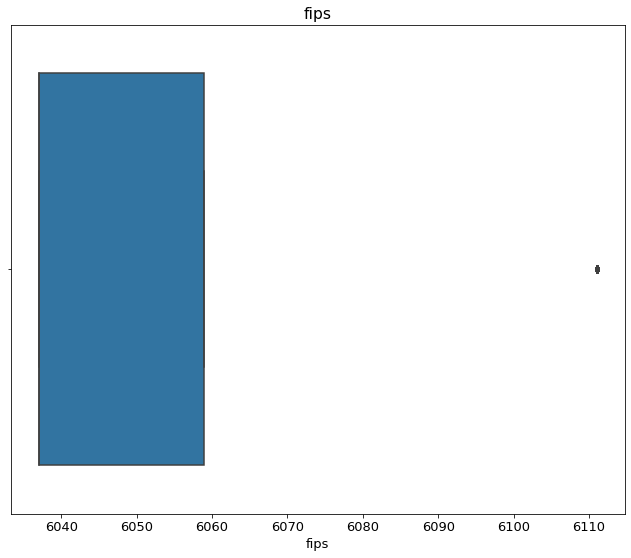

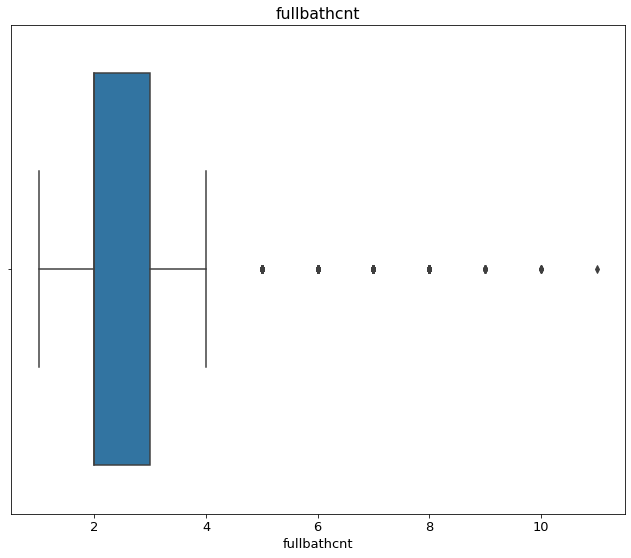

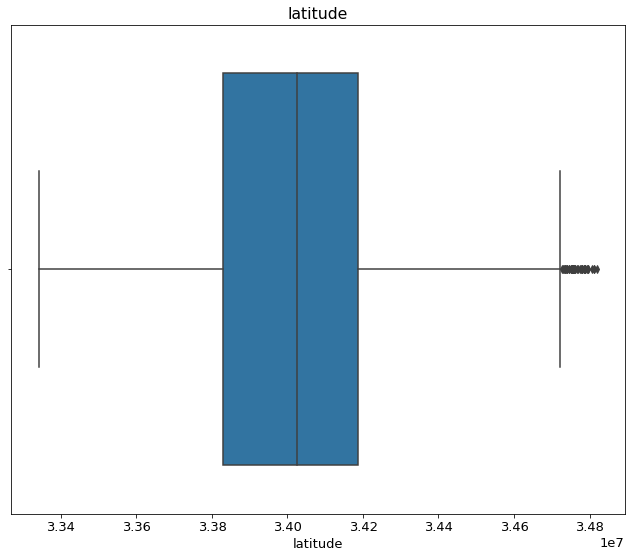

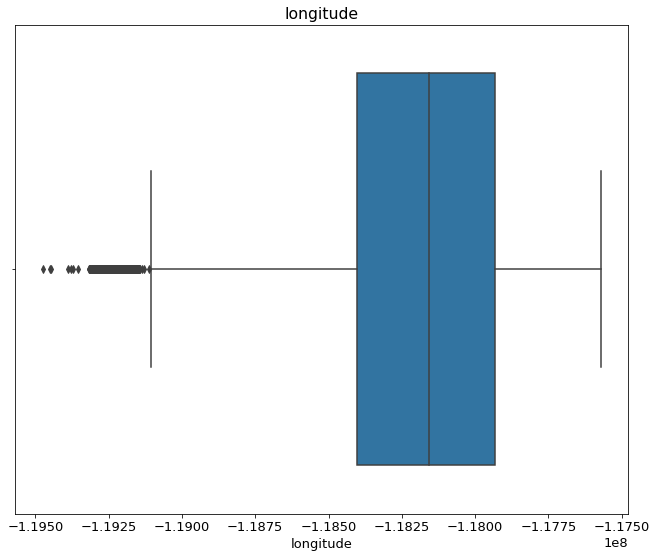

In [30]:
#Looking at boxplots before outliers are dropped
for col in box_plot_list_2:
    sns.boxplot(zillow_df[col])
    plt.title(col)
    plt.show()

### Drop Outliers

In [31]:
# drop outliers from logerror before binning (too many values that are outliers)
#will help normalize data (will help us predict on regular/average log error)
prepare.outlier_bound_calculation(zillow_df, 'logerror')

For logerror the lower bound is -0.12231178365908749 and  upper bound is 0.1385433422414125


In [32]:
#remove outliers from calculatedfinishedsquarefeet
zillow_df= zillow_df[zillow_df.logerror > -0.12146404504604998]
zillow_df= zillow_df[zillow_df.logerror < 0.13465062943515]

In [33]:
# drop outliers from latitude column
prepare.outlier_bound_calculation(zillow_df, 'latitude')

For latitude the lower bound is 33277904.25 and  upper bound is 34737942.25


In [34]:
#remove outliers from calculatedfinishedsquarefeet
zillow_df= zillow_df[zillow_df.latitude > 33293545.25]
zillow_df= zillow_df[zillow_df.latitude < 34723703.25]

In [35]:
# drop outliers from longitude column
prepare.outlier_bound_calculation(zillow_df, 'longitude')

For longitude the lower bound is -119120828.5 and  upper bound is -117204552.5


In [36]:
#remove outliers from calculatedfinishedsquarefeet
zillow_df= zillow_df[zillow_df.longitude > -119106937.0]
zillow_df= zillow_df[zillow_df.longitude < -117227873.0]

In [37]:
# drop outliers from calculatedfinishedsquarefeet column
prepare.outlier_bound_calculation(zillow_df, 'calculatedfinishedsquarefeet')

For calculatedfinishedsquarefeet the lower bound is -225.0 and  upper bound is 3783.0


In [38]:
#remove outliers from calculatedfinishedsquarefeet
zillow_df= zillow_df[zillow_df.calculatedfinishedsquarefeet > -255.0]
zillow_df= zillow_df[zillow_df.calculatedfinishedsquarefeet <  3801.0]

In [39]:
# drop outliers from bedroom count column
prepare.outlier_bound_calculation(zillow_df, 'bedroomcnt')

For bedroomcnt the lower bound is 1.5 and  upper bound is 5.5


In [40]:
zillow_df= zillow_df[zillow_df.bedroomcnt > 1.5]
zillow_df= zillow_df[zillow_df.bedroomcnt <  5.5]

In [41]:
# drop outliers from full bath count column
prepare.outlier_bound_calculation(zillow_df, 'fullbathcnt')

For fullbathcnt the lower bound is 0.5 and  upper bound is 4.5


In [42]:
zillow_df= zillow_df[zillow_df.fullbathcnt > 0.5]
zillow_df= zillow_df[zillow_df.fullbathcnt <  4.5]

In [43]:
# drop outliers from fips column
prepare.outlier_bound_calculation(zillow_df, 'fips')

For fips the lower bound is 6004.0 and  upper bound is 6092.0


In [44]:
zillow_df= zillow_df[zillow_df.fips >  6004.0]
zillow_df= zillow_df[zillow_df.fips <  6092.0]

### Boxplots after outliers dropped

In [45]:
#Creating box_plot_list for boxplots (had to exclude)
box_plot_list_ao= zillow_df[['bedroomcnt', 'calculatedfinishedsquarefeet',  'fips',
                         'fullbathcnt', 'latitude', 'longitude' ]]

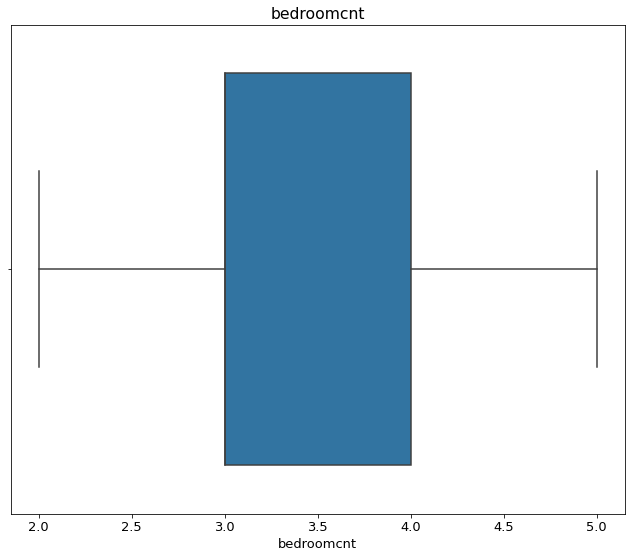

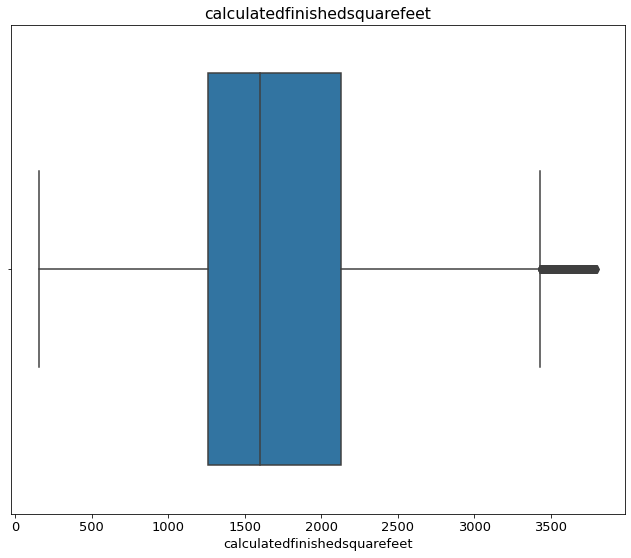

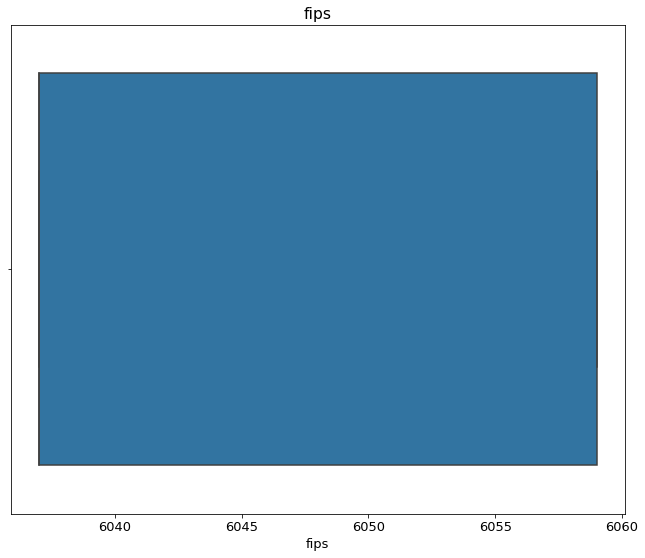

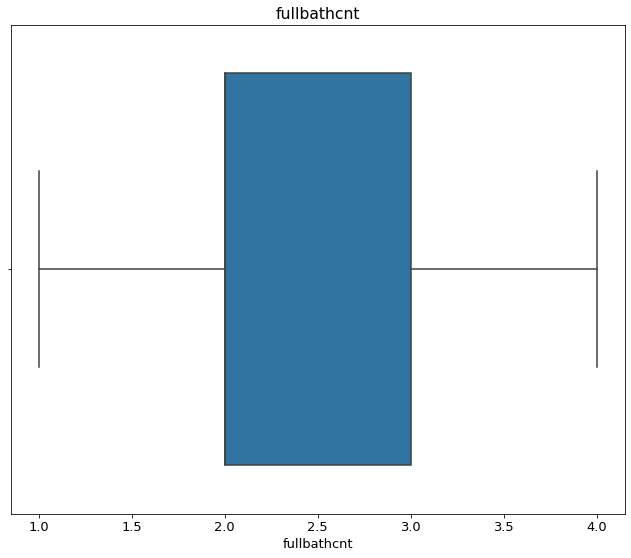

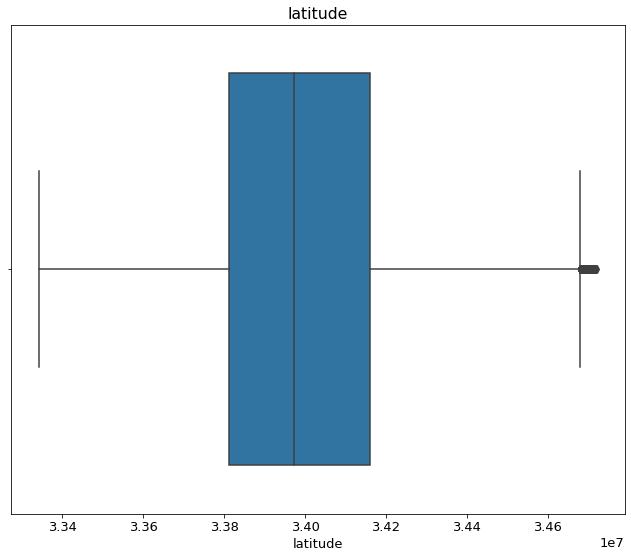

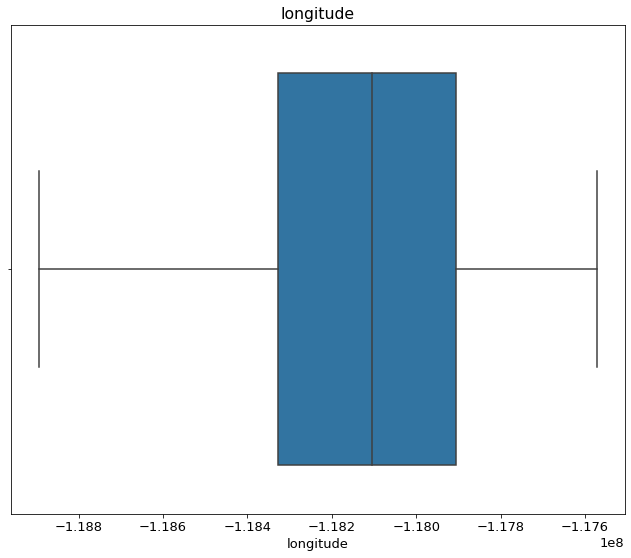

In [46]:
#Looking at boxplots after outliers are dropped
for col in box_plot_list_ao:
    sns.boxplot(zillow_df[col])
    plt.title(col)
    plt.show()

In [47]:
#Looking to stats to see where to bin and sort by index
zillow_df['logerror'].value_counts(bins=4).sort_index()

(-0.123, -0.0574]      3324
(-0.0574, 0.00663]    16267
(0.00663, 0.0706]     15208
(0.0706, 0.135]        3031
Name: logerror, dtype: int64

In [48]:
#Create logerror bins to 
# #Will be easier to see insights and better for visuals
zillow_df['logerror_bins'] = pd.cut(zillow_df.logerror, [-0.123, -0.0574, 0.00663, 0.0706, 0.135])

## Prepare Findings:
- Initial drop of nulls (compared to initial shape): dropped 661 rows and 37 columns
- Last drop of nulls (compared to initial shape): dropped 2,014 rows and 37 columns
- A great deal of nulls in columns and rows that need to be removed and/or filled in
- outliers are present and need to be removed
- duplicated parcelid was dropped
- created bin for logerror to be able to view better visually and compare to other features
- After MVP I had to go back and drop object/category columns from X_train 
    - Must drop the logerror bin column from X_train so it does overfit to our target
    - do not need any of the non-numeric columns and will need to drop before modeling but after split: logerror
    - drop any unique identifier columns because can skew data before split: ID, parcelID, propertylandusetypeid, rawcensustractandblock, regionidcity, regionidcounty, regionidzip, censustractandblock, transactiondate, propertycountlandusecode, propertylandusedesc 

- Drop outliers from selected columns including logerror target to help data be more normalized data

- Built logerror bins values by looking at value counts and binning them

# Explore

- Split by using function from prepare.py

In [49]:
train, validate, test= prepare.split_continuous(zillow_df)

train -> (21184, 29)
validate -> (9080, 29)
test -> (7566, 29)


In [50]:
#Looking at first 5 values to see train printed
train.head()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,logerror_bins
15742,2.5,3.0,2.5,2085.0,2085.0,6059.0,2.0,33475720.0,-117681697.0,5250.0,...,1.092816,0.120523,0.1,0.5,96.851319,0.3,96.399619,0.4,0.833333,"(0.00663, 0.0706]"
39703,3.0,3.0,3.0,1624.0,1624.0,6037.0,3.0,34024511.0,-118441730.0,4991.0,...,1.211391,0.114578,0.1,0.4,122.980296,0.4,160.067321,0.5,1.000000,"(0.00663, 0.0706]"
4757,2.0,3.0,2.0,1264.0,1264.0,6037.0,2.0,33939785.0,-118183287.0,5388.0,...,1.313531,0.123691,0.1,0.3,98.755538,0.3,34.751485,0.3,0.666667,"(-0.0574, 0.00663]"
13150,2.0,3.0,2.0,1244.0,1244.0,6059.0,2.0,33703582.0,-118021466.0,6000.0,...,1.124761,0.137741,0.1,0.2,56.985531,0.2,104.185000,0.5,0.666667,"(-0.0574, 0.00663]"
39558,3.0,3.0,3.0,2052.0,2052.0,6037.0,3.0,34457937.0,-118625495.0,7172.0,...,1.377192,0.164646,0.2,0.5,124.604288,0.4,12.937395,0.2,1.000000,"(0.00663, 0.0706]"


- Looking at correlation by logerror by creating correlation table

In [136]:
#Looking at correlation by logerror
train.corr()[['logerror']].sort_values(by='logerror', ascending=False)

,logerror
logerror,1.000000
calculatedfinishedsquarefeet,0.082810
finishedsquarefeet12,0.082810
sqft_bin,0.077556
cluster_latitude_calculatedsqft,0.073230
bathroomcnt,0.068160
calculatedbathnbr,0.068160
fullbathcnt,0.063351
cluster_latitude_yearbuilt,0.053035
bedroomcnt,0.045896


<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

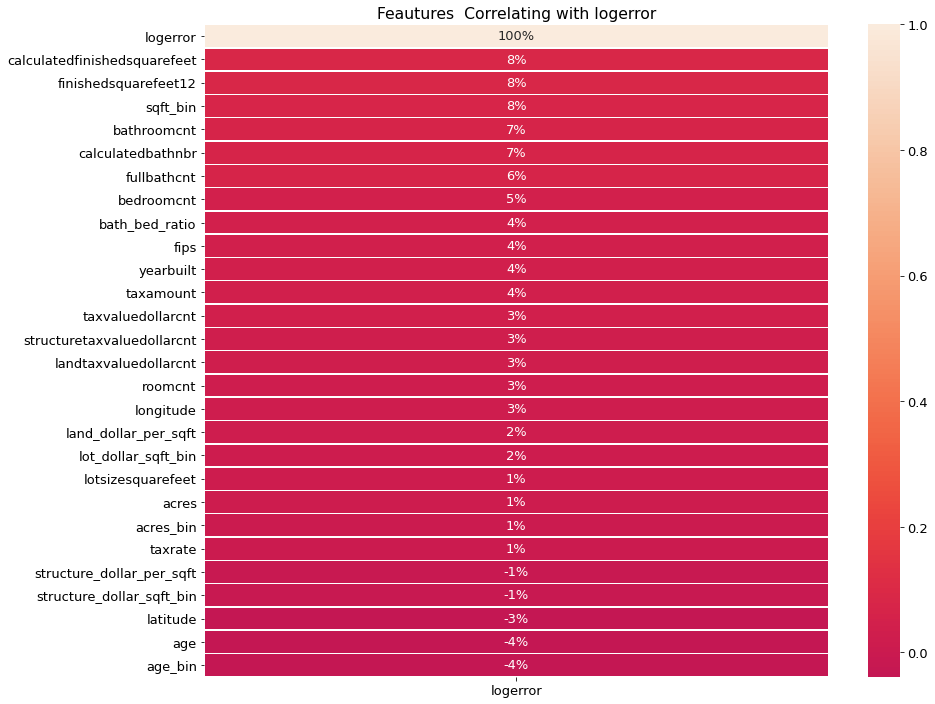

In [52]:
#correlation map of all features before clustering
prepare.get_heatmap(train, 'logerror', color= 'rocket')

In [53]:
# Making column list for first set of features
col_list=train[['logerror', 'latitude', 'longitude', 'calculatedfinishedsquarefeet', 'bedroomcnt']]

<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

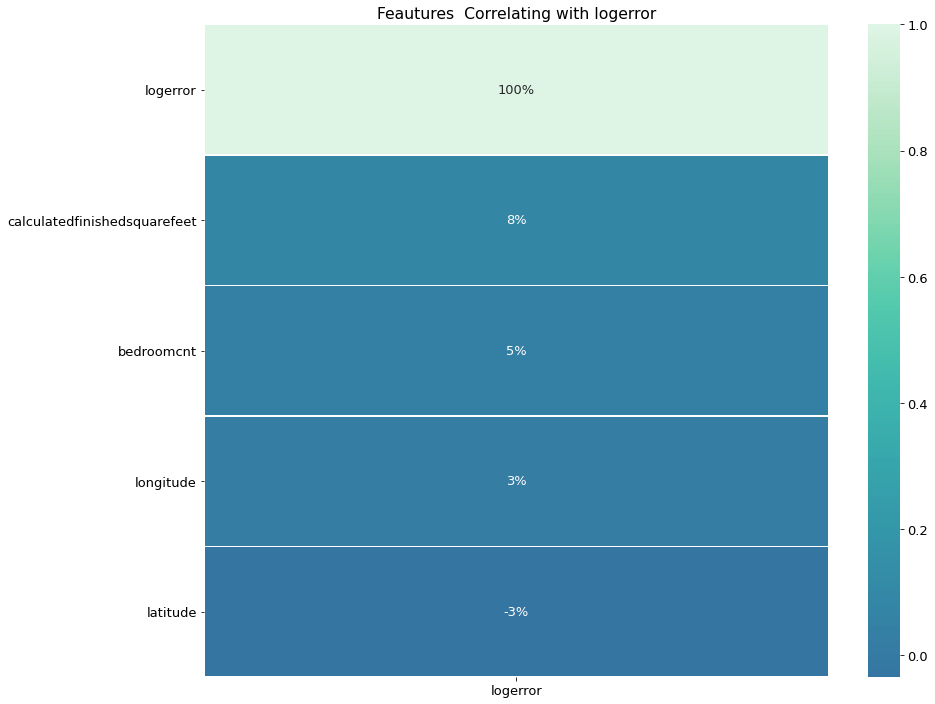

In [54]:
#Looking at correlation heatmap of first set of features
prepare.get_heatmap(col_list, 'logerror')

In [55]:
#Column list for second set of features
col_list2=train[['logerror', 'latitude', 'longitude', 'calculatedfinishedsquarefeet', 'bedroomcnt', 'fullbathcnt', 'fips']]

<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

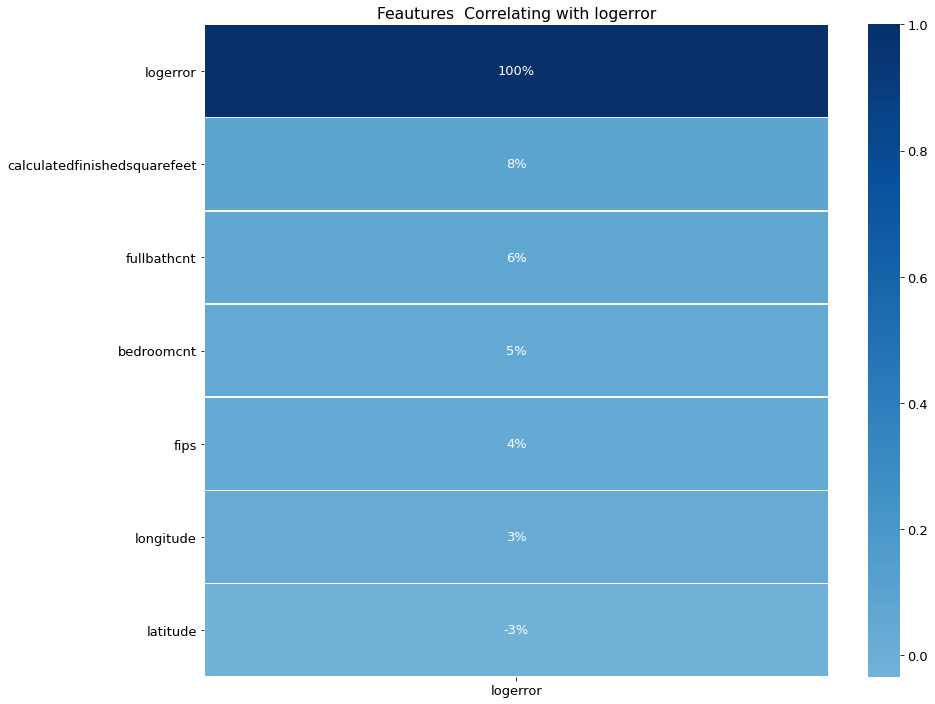

In [56]:
#Looking at correlation heatmap of second set of features
prepare.get_heatmap(col_list2, 'logerror', color= 'Blues')

In [57]:
#Making a column list for third set of features
col_list3= train[['logerror', 'latitude', 'longitude', 'calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt', 'fips']]

<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

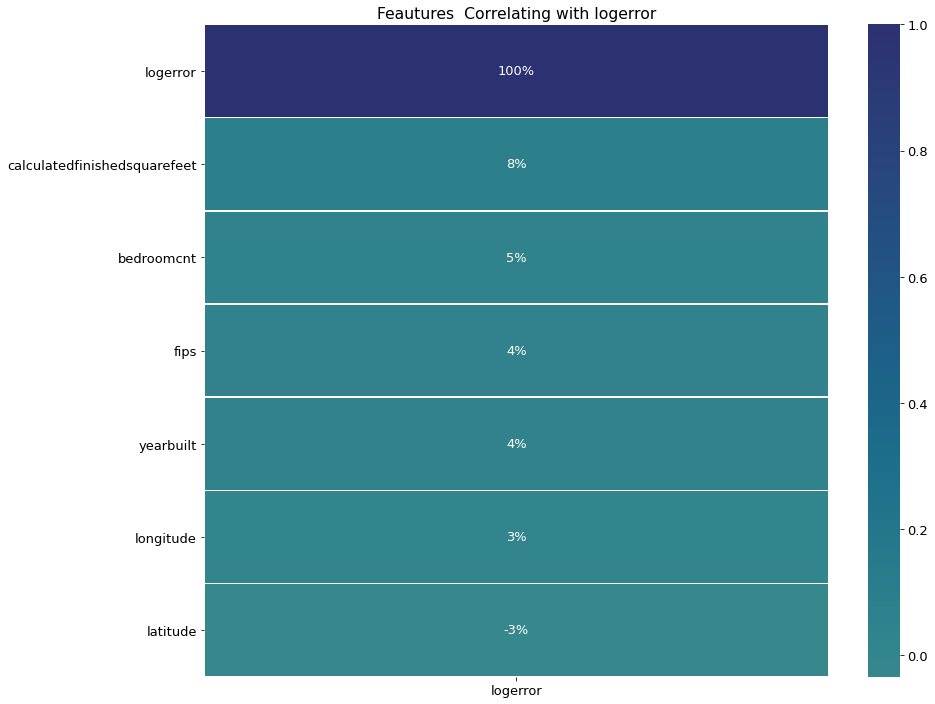

In [58]:
#Looking at correlation heatmap of third set of features
prepare.get_heatmap(col_list3, 'logerror', color= 'crest')

## Statistics: Before Clustering

### Hypothesis 1:
> - **Hypothesis 1 -** I rejected the Null Hypothesis; there is a relationship.
> - alpha = .05
> - $H_0$: calculatedfinishedsquarefeet has no relationship with logerror. 
> - $H_a$: calculatedfinishedsquarefeet has a relationship with logerror. 

<function matplotlib.pyplot.show(close=None, block=None)>

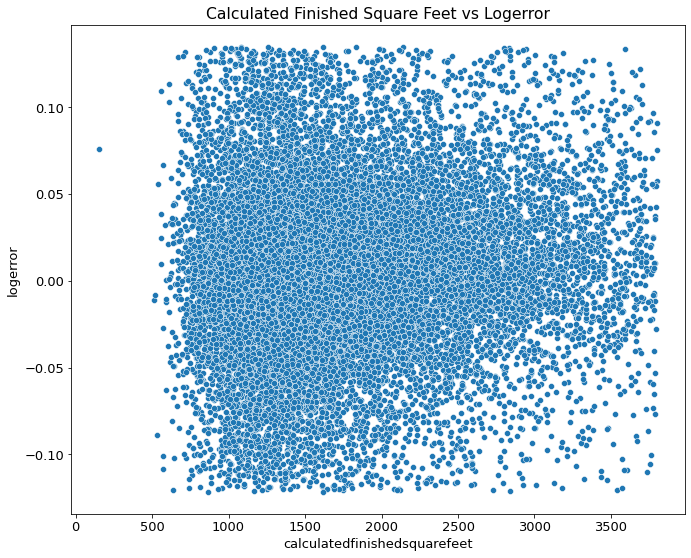

In [59]:
sns.scatterplot(x='calculatedfinishedsquarefeet', y = 'logerror', data= train)
plt.title('Calculated Finished Square Feet vs Logerror')
plt.show

In [60]:
#Performed pearson correlation
corr, p= stats.pearsonr(train.logerror, train.calculatedfinishedsquarefeet)
print(corr,p)

0.08281018664228398 1.470047521174988e-33


In [61]:
alpha= 0.05

null = 'There is no relationship between calculatedfinishedsquarefeet and logerror'

if p < alpha:
    print(f' we reject the null hypothesis,  {null}')
else:
    print(f' we do not reject the null hypothesis, {null}')

 we reject the null hypothesis,  There is no relationship between calculatedfinishedsquarefeet and logerror


### Hypothesis 2:
> - **Hypothesis 2 -** I do not reject the Null Hypothesis; there is a difference in the means.
> - alpha = .05
> - $H_0$: There is no difference in means between bathroom count and logerror. 
> - $H_a$: There is a difference in means between bathroom count and logerror. 

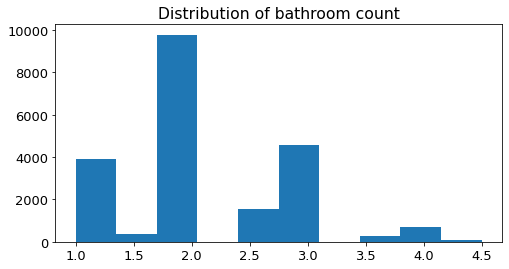

In [140]:
#looking at distribution for bedroom count
plt.figure(figsize=(8,4))
plt.hist(train['bathroomcnt'])
plt.title(f'Distribution of bathroom count')
plt.show()

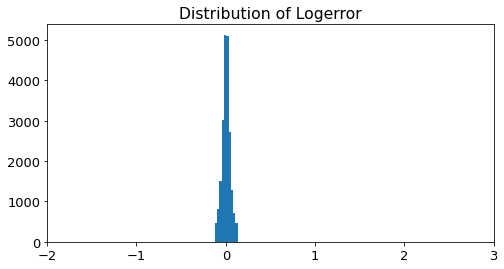

In [141]:
#Looking at distribution for logerror
plt.figure(figsize=(8,4))
plt.hist(train['logerror'])
plt.title(f'Distribution of Logerror')
plt.xlim(-2, 3)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

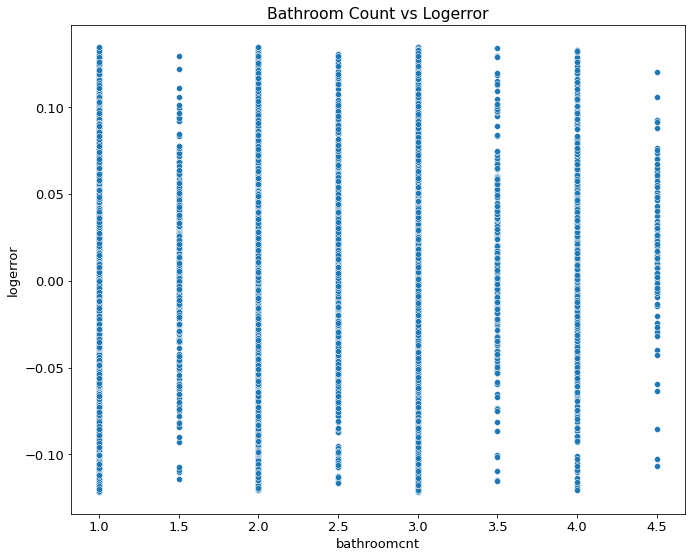

In [144]:
sns.scatterplot(x='bathroomcnt', y = 'logerror', data= train)
plt.title('Bathroom Count vs Logerror')
plt.show

In [150]:
#Looking at stats for bedroom count to do variance test
train['bathroomcnt'].describe().T

count    21184.000000
mean         2.155990
std          0.765276
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          4.500000
Name: bathroomcnt, dtype: float64

In [146]:
# test the assumption of equal variance
stats.levene(train[train.bathroomcnt <= 2].logerror, 
             train[train.bathroomcnt > 2].logerror
            )

LeveneResult(statistic=51.28521526650117, pvalue=8.248806810087178e-13)

In [147]:
#Mannwhiteneyu test (a type of t-test when not normally distributed)

group1 = train[train.bathroomcnt <= 2]['logerror']
group2 = train[train.bathroomcnt <= 2]['logerror']

t, p2= stats.mannwhitneyu(group1, group2)

t,p2

(98210112.5, 0.4999997055183104)

In [149]:
alpha= 0.05

null = 'There is no difference in means between bathroom count and logerror'

if p2 < alpha:
    print(f' we reject the null hypotheis,  {null}')
else:
    print(f' we do not reject the null hypothesis, {null}')

 we do not reject the null hypothesis, There is no difference in means between bathroom count and logerror


### Hypothesis 3:
> - **Hypothesis 3 -** I rejected the Null Hypothesis; there is a relationship.
> - alpha = .05
> - $H_0$: There is no relationship between latitude and logerror. 
> - $H_a$: There is a relationship between latitude and logerror.

<function matplotlib.pyplot.show(close=None, block=None)>

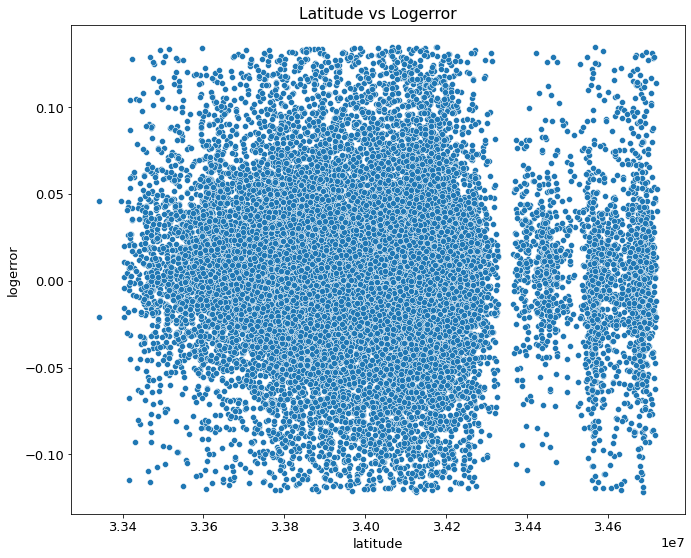

In [69]:
sns.scatterplot(x='latitude', y = 'logerror', data= train)
plt.title('Latitude vs Logerror')
plt.show

In [70]:
#Performed Pearson correlation
corr3, p3 = stats.pearsonr(train.logerror, train.latitude)
print(corr,p3)

0.08281018664228398 7.752157549089802e-07


In [71]:
alpha= 0.05

null = 'There is no relationship between latitude and logerror'

if p3 < alpha:
    print(f' we reject the null hypotheis,  {null}')
else:
    print(f' we do not reject the null hypothesis, {null}')

 we reject the null hypotheis,  There is no relationship between latitude and logerror


## Takeaways: Exploration before Clustering
- logerror has low correlation rates thus does not correlate well with any one feature
    - highest correlated features include:
        - 7%: Bathroom Count
        - -4%: Structure dollar per square feet (binned)
        - 3%: Finished square feet 12 (finished living area), calculated Finished Square Feet (calculated total finish living area of home), bathroom count, calculatedbathnbr (# of bathrooms in home including fractional bathroom), Full bath count, square feet bin
        - 2%: Longitude (West to East), yearbuilt, tax rate
        
        
### Hypothesis 1:
> - **Hypothesis 1 -** I rejected the Null Hypothesis; there is a relationship.
> - alpha = .05
> - $H_0$: calculatedfinishedsquarefeet has no relationship with logerror. 
> - $H_a$: calculatedfinishedsquarefeet has a relationship with logerror. 

### Hypothesis 2:
> - **Hypothesis 2 -** I do not reject the Null Hypothesis; there is a difference in the means.
> - alpha = .05
> - $H_0$: There is no difference in means between bathroom count and logerror. 
> - $H_a$: There is a difference in means between bathroom count and logerror. 

### Hypothesis 3:
> - **Hypothesis 3 -** I rejected the Null Hypothesis; there is a relationship.
> - alpha = .05
> - $H_0$: There is no relationship between latitude and logerror. 
> - $H_a$: There is a relationship between latitude and logerror.

<b>- Due to lack of correlation we will perform clustering to try and find more features</b>

## Exploring: Clustering

In [73]:
# define independent variables for k-means

X = train[['latitude', 'calculatedfinishedsquarefeet']]
X.head()

,latitude,calculatedfinishedsquarefeet
15742,33475720.0,2085.0
39703,34024511.0,1624.0
4757,33939785.0,1264.0
13150,33703582.0,1244.0
39558,34457937.0,2052.0


In [77]:
# use the functions from explore.py: 3 clusters

df, X_scaled, scaler, kmeans, centroids_scaled = explore.create_cluster(train, X, 3, col_name= 'cluster_latitude_calculatedsqft')

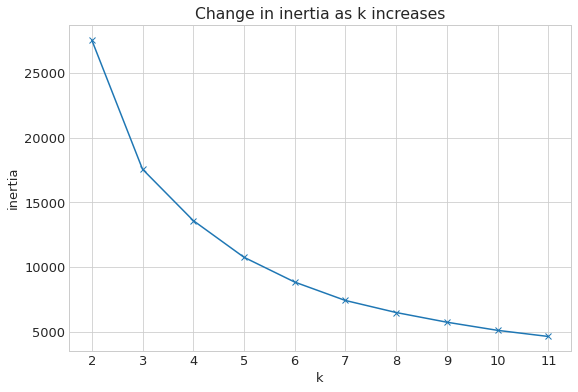

In [78]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

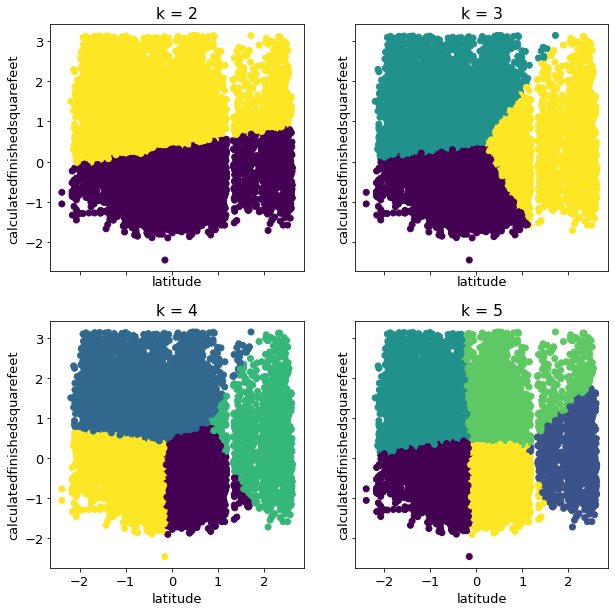

In [79]:
#Use function from explore to make clusters 2-5 charts to see overall options
explore.four_scatter_plots(X_scaled, col_name= 'latitude', col_name_two= 'calculatedfinishedsquarefeet')

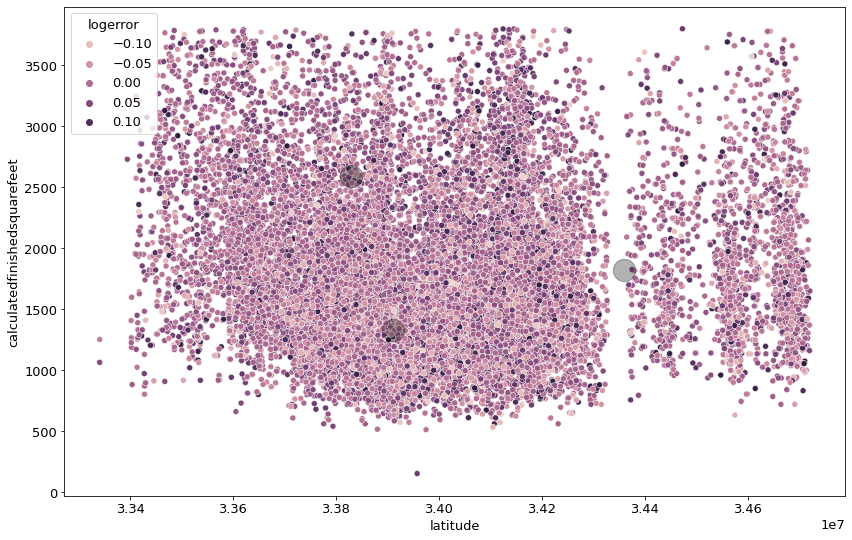

In [80]:
# use the functions from explore.py file to plot

explore.create_scatter_plot('latitude', 'calculatedfinishedsquarefeet', train, kmeans, X_scaled, scaler, hue_column= 'logerror')

## Second Clustering

In [81]:
# define independent variables for k-means

X2 = train[['latitude', 'longitude']]
X2.head()

,latitude,longitude
15742,33475720.0,-117681697.0
39703,34024511.0,-118441730.0
4757,33939785.0,-118183287.0
13150,33703582.0,-118021466.0
39558,34457937.0,-118625495.0


In [82]:
# use the functions created in explore.py: 3 clusters
df, X_scaled3, scaler3, kmeans3, centroids_scaled3 = explore.create_cluster(train, X2, 3, 'cluster_latitude_longitude')

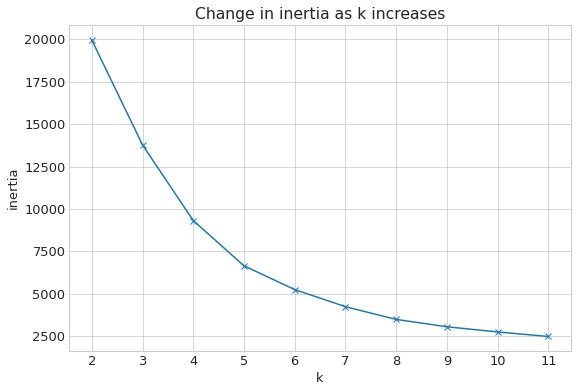

In [83]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled3).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

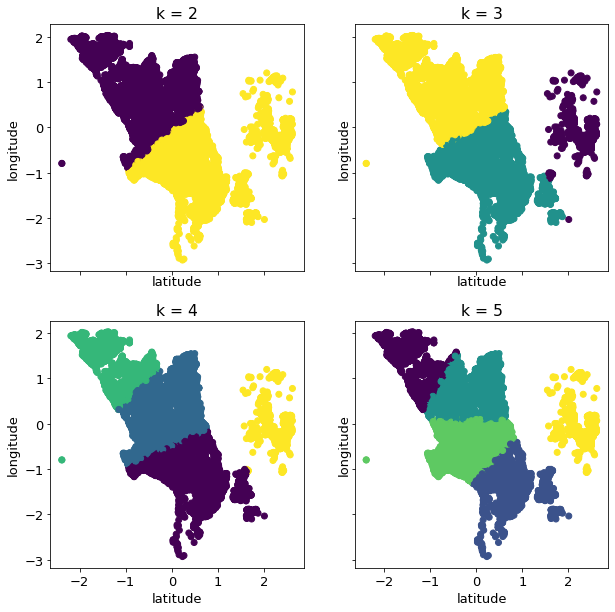

In [84]:
#Use function from explore to make clusters 2-5 charts to see overall options
explore.four_scatter_plots(X_scaled3, col_name= 'latitude', col_name_two='longitude')

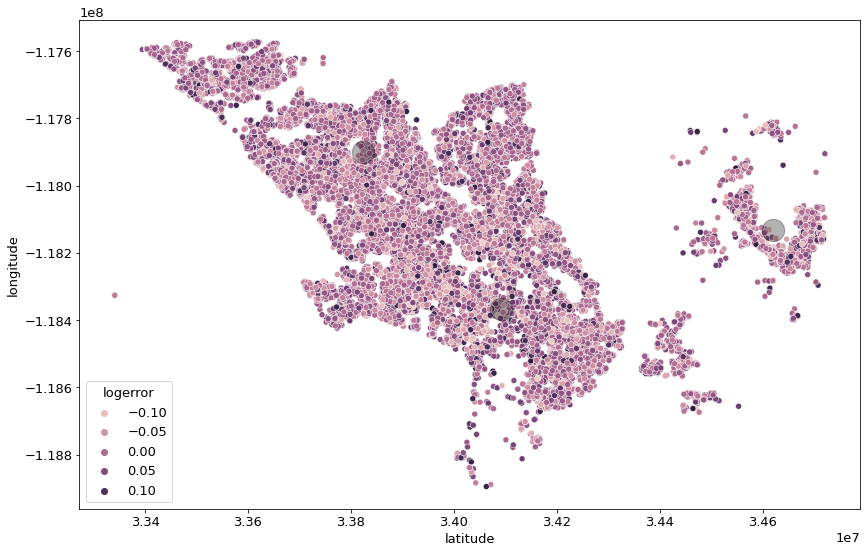

In [85]:
# use the functions created from explore.py

explore.create_scatter_plot('latitude', 'longitude', train, kmeans3, X_scaled3, scaler3, hue_column= 'logerror')

## Third Clustering

In [86]:
# define independent variables for k-means

X4 = train[['latitude', 'yearbuilt']]
X4.head()

,latitude,yearbuilt
15742,33475720.0,1980.0
39703,34024511.0,1941.0
4757,33939785.0,1926.0
13150,33703582.0,1965.0
39558,34457937.0,2001.0


In [87]:
# use the functions from explore.py: 3 clusters

df, X_scaled4, scaler4, kmeans4, centroids4 = explore.create_cluster(train, X4, 3, 'cluster_latitude_yearbuilt' )

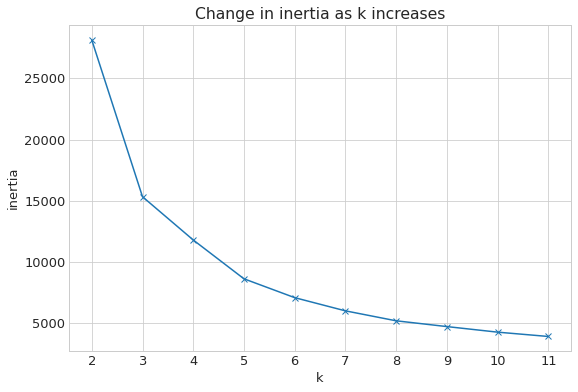

In [88]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled4).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

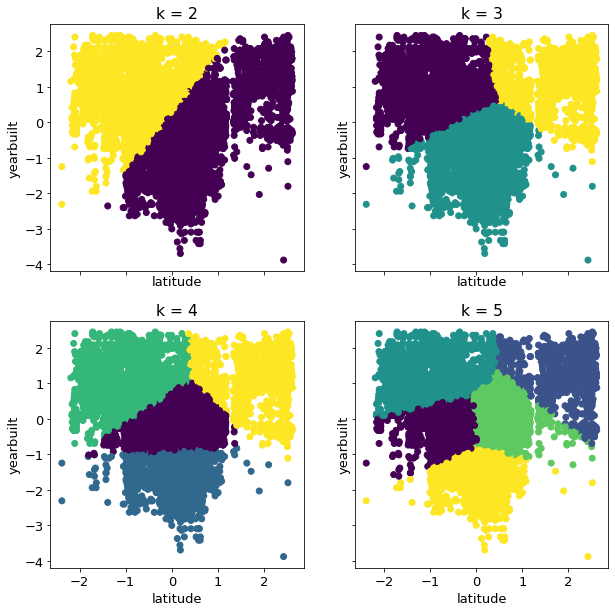

In [89]:
#Use function from explore to make clusters 2-5 charts to see overall options
explore.four_scatter_plots(X_scaled4, col_name= 'latitude', col_name_two='yearbuilt')

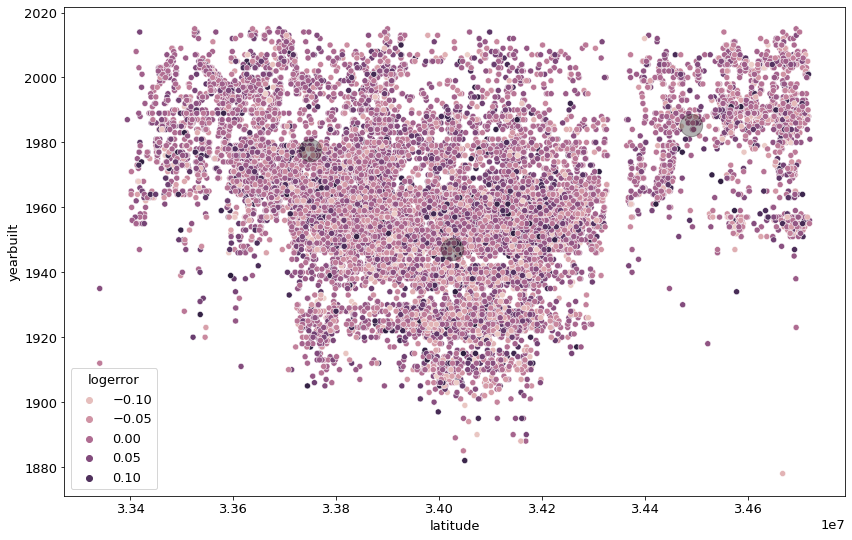

In [90]:
# use the functions created above to plot the data
explore.create_scatter_plot('latitude', 'yearbuilt', train, kmeans4, X_scaled4, scaler4, hue_column='logerror' )

## Further Exploration after performing Clustering: Correlations and Statitistical testing

<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

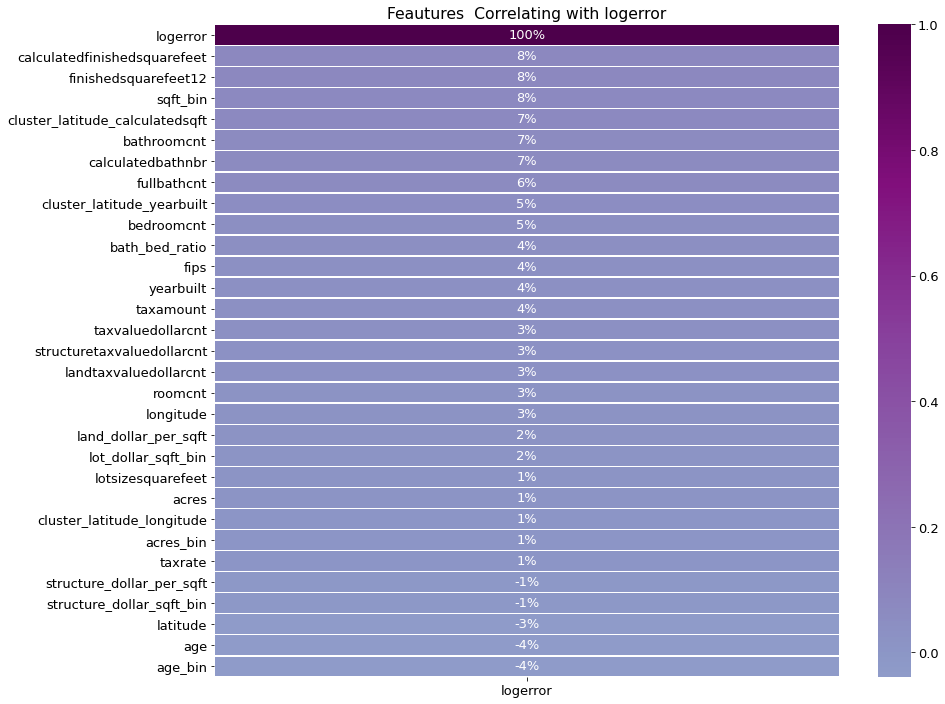

In [91]:
prepare.get_heatmap(train, 'logerror', color= 'BuPu')

In [92]:
#Creating column list with clusters as part of features
col_list_clusters_fts= train[['logerror','cluster_latitude_calculatedsqft', 'cluster_latitude_longitude', 'cluster_latitude_yearbuilt', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin', 'bath_bed_ratio' ]]

<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

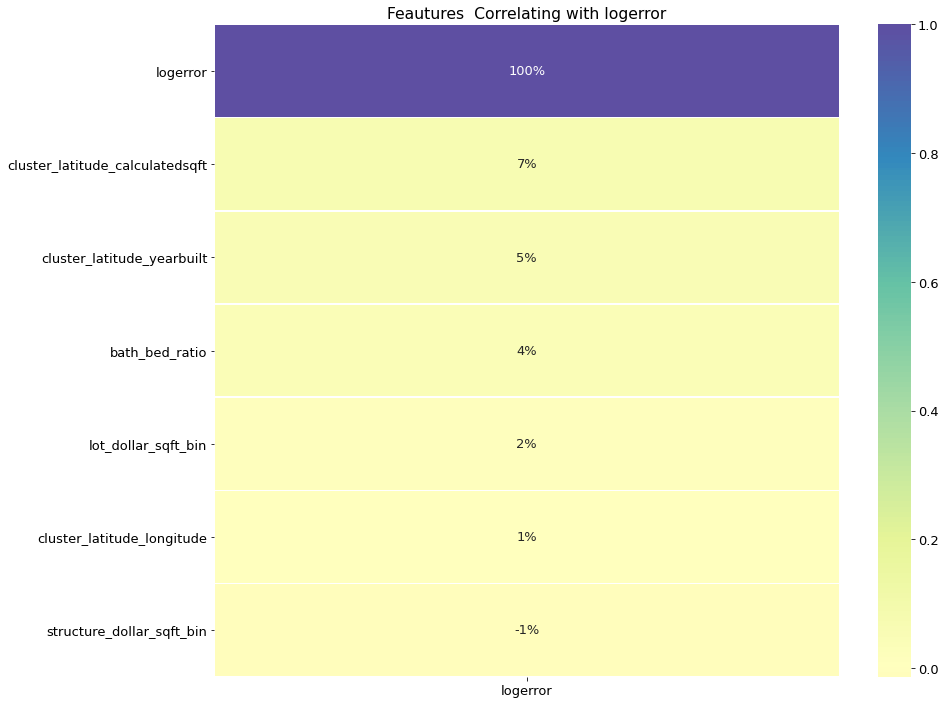

In [93]:
#Looking at correlation heatmap for features listed above
prepare.get_heatmap(col_list_clusters_fts, 'logerror', color= 'Spectral' )

## Statistics: After Clustering

### Hypothesis 4:
> - **Hypothesis 4 -** I rejected the Null Hypothesis; there is a difference in means between logerror and cluster_latitude_calulatedsqft.
> - alpha = .05
> - $H_0$: There is no difference in means between logerror and cluster_latitude_calulatedsqft. 
> - $H_a$: There is a difference in means between logerror and cluster_latitude_calulatedsqft. 

In [95]:
#Looking at stats for bedroom count to do variance test
train['cluster_latitude_calculatedsqft'].describe().T

count    21184.00000
mean         0.71521
std          0.82469
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          2.00000
Name: cluster_latitude_calculatedsqft, dtype: float64

In [96]:
# test the assumption of equal variance
stats.levene(train[train.cluster_latitude_calculatedsqft <= 0.70].logerror, 
             train[train.cluster_latitude_calculatedsqft > 0.70].logerror
            )

LeveneResult(statistic=0.9968919806926851, pvalue=0.3180751335583488)

In [97]:
#Independent test (a type of t-test when is normally distributed)

group1 = train[train.cluster_latitude_calculatedsqft <= 0.70]['logerror']
group2 = train[train.cluster_latitude_calculatedsqft > 0.70]['logerror']



t2, p3= stats.ttest_ind(group1, group2)

t2, p3

(-7.875399616924003, 3.5591631102715286e-15)

In [98]:
alpha= 0.05

null = 'There is no difference in means between logerror and cluster_latitude_calulatedsqft.'

if p3 < alpha:
    print(f' we reject the null hypotheis,  {null}')
else:
    print(f' we do not reject the null hypothesis, {null}')

 we reject the null hypotheis,  There is no difference in means between logerror and cluster_latitude_calulatedsqft.


### Hypothesis 5:
> - **Hypothesis 5 -** I rejected the Null Hypothesis; there is a difference in means between logerror and cluster_latitude_yearbuilt.
> - alpha = .05
> - $H_0$: There is no difference in means between logerror and cluster_latitude_yearbuilt. 
> - $H_a$: There is a difference in means between logerror and cluster_latitude_yearbuilt.

In [99]:
#Looking at stats for bedroom count to do variance test
train['cluster_latitude_yearbuilt'].describe().T

count    21184.000000
mean         0.775302
std          0.903670
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max          2.000000
Name: cluster_latitude_yearbuilt, dtype: float64

In [100]:
# test the assumption of equal variance
stats.levene(train[train.cluster_latitude_yearbuilt <= 0.77].logerror, 
             train[train.cluster_latitude_yearbuilt > 0.77].logerror
            )

LeveneResult(statistic=256.74663701343513, pvalue=1.9119537835491395e-57)

In [101]:
#Independent test (a type of t-test when is normally distributed)

group1 = train[train.cluster_latitude_yearbuilt <= 0.77]['logerror']
group2 = train[train.cluster_latitude_yearbuilt > 0.77]['logerror']



t3, p4= stats.ttest_ind(group1, group2)

t3, p4

(-6.5637625674082605, 5.368118188922957e-11)

In [102]:
alpha= 0.05

null = 'There is no difference in means between logerror and cluster_latitude_yearbuilt'

if p4 < alpha:
    print(f' we reject the null hypothesis,  {null}')
else:
    print(f' we do not reject the null hypothesis, {null}')

 we reject the null hypothesis,  There is no difference in means between logerror and cluster_latitude_yearbuilt


### Splitting into X and y datasets for train, validate, and test (after clustering)

In [103]:
# splitting into X and y datasets for train, validate, and test (after clustering)
X_train, y_train, X_validate, y_validate, X_test, y_test= prepare.train_validate_test(train, 'logerror')

In [104]:
#Looking the shape for each dataset created
X_train.shape, y_train.shape, X_validate.shape, y_validate.shape, X_test.shape, y_test.shape

((11862, 31), (11862,), (5085, 31), (5085,), (4237, 31), (4237,))

In [105]:
#Seeing what columns are in X_train before dropping logerror bins
X_train.columns.tolist()

['bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'age',
 'age_bin',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'structure_dollar_per_sqft',
 'structure_dollar_sqft_bin',
 'land_dollar_per_sqft',
 'lot_dollar_sqft_bin',
 'bath_bed_ratio',
 'logerror_bins',
 'cluster_latitude_calculatedsqft',
 'cluster_latitude_longitude',
 'cluster_latitude_yearbuilt']

In [106]:
#Use function from explore to drop logerror bins from X_train, X_validate, and X_test before modeling
# Need to drop logerror bins column so it's not overfit to the target
X_train, X_validate, X_test= explore.drop_logerror_bins(X_train, X_validate, X_test, col= 'logerror_bins')

In [107]:
#Looking at columns in X_train to be sure logerror bins was dropped
X_train.columns.tolist()

['bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'age',
 'age_bin',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'structure_dollar_per_sqft',
 'structure_dollar_sqft_bin',
 'land_dollar_per_sqft',
 'lot_dollar_sqft_bin',
 'bath_bed_ratio',
 'cluster_latitude_calculatedsqft',
 'cluster_latitude_longitude',
 'cluster_latitude_yearbuilt']

In [108]:
#Looking at columns in X_validate to be sure logerror bins was dropped
X_validate.columns.tolist()

['bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'age',
 'age_bin',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'structure_dollar_per_sqft',
 'structure_dollar_sqft_bin',
 'land_dollar_per_sqft',
 'lot_dollar_sqft_bin',
 'bath_bed_ratio',
 'cluster_latitude_calculatedsqft',
 'cluster_latitude_longitude',
 'cluster_latitude_yearbuilt']

In [109]:
#Looking at columns in X_test to be sure logerror bins was dropped
X_test.columns.tolist()

['bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'age',
 'age_bin',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'structure_dollar_per_sqft',
 'structure_dollar_sqft_bin',
 'land_dollar_per_sqft',
 'lot_dollar_sqft_bin',
 'bath_bed_ratio',
 'cluster_latitude_calculatedsqft',
 'cluster_latitude_longitude',
 'cluster_latitude_yearbuilt']

## Takeways After Exploration with Clusters:
- logerror has low correlation rates to features in general
    - highest correlated features include:
        - 4%: Bedroom count
        - -4%: Structure dollar per square feet (binned)
        - 3%: Finished square feet 12 (finished living area), calculated Finished Square Feet (calculated total finish living area of home), bathroom count, calculatedbathnbr (# of bathrooms in home including fractional bathroom), Full bath count, <font color=yellow>cluster_latitude_calculatedsqft, cluster_latitude_yearbuilt</font>, square feet bin
        - 2%: Longitude (West to East), yearbuilt, tax rate

- Performed statistics test only clusters that had value (<font color=yellow>cluster_latitude_calculatedsqft, cluster_latitude_yearbuilt</font>)

### Hypothesis 4:
> - **Hypothesis 4 -** I rejected the Null Hypothesis; there is a difference in means between logerror and cluster_latitude_calulatedsqft.
> - alpha = .05
> - $H_0$: There is no difference in means between logerror and cluster_latitude_calulatedsqft. 
> - $H_a$: There is a difference in means between logerror and cluster_latitude_calulatedsqft. 

### Hypothesis 5:
> - **Hypothesis 5 -** I rejected the Null Hypothesis; there is a difference in means between logerror and cluster_latitude_yearbuilt.
> - alpha = .05
> - $H_0$: There is no difference in means between logerror and cluster_latitude_yearbuilt. 
> - $H_a$: There is a difference in means between logerror and cluster_latitude_yearbuilt.

- Performed several clusters but only find value in the cluster with latitude and calculated square feet and cluster with latitude and yearbuilt
    - correlation not very high but has value compared to other features   
- Before modeling drop logerror bin column: This will help model not be overfit to the target.
        

# Model and Evaluate

## Baseline Model

<b> Created a Baseline Model </b>

In [110]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values.
# make it a dataframe
y_train= pd.DataFrame(y_train)
y_validate = pd.DataFrame( y_validate)
y_test = pd.DataFrame(y_test)

In [111]:
#Looking at what y_train dataframe looks like
y_train.head()

,logerror
35936,0.020778
46969,-0.026339
13010,-0.036576
22595,0.022329
44095,0.005866


In [112]:
#Looking at what y_train dataframe looks like
y_validate.head()

,logerror
51961,-0.028620
26260,0.000119
13216,-0.023745
9578,0.028136
31246,0.002587


In [113]:
#Looking at what y_train dataframe looks like
y_test.head()

,logerror
15236,0.007635
50433,0.119231
9167,0.011471
16805,-0.003227
52877,0.019565


In [114]:
#Created baseline
baseline= y_train['logerror'].mean()

In [115]:
#Making baseline column
y_train['baseline'] = baseline

In [116]:
#verifying baseline column was added
y_train.head()

,logerror,baseline
35936,0.020778,0.005026
46969,-0.026339,0.005026
13010,-0.036576,0.005026
22595,0.022329,0.005026
44095,0.005866,0.005026


In [119]:
#calculate RMSE for baseline model
rmse_baseline= math.sqrt(mean_squared_error(y_train.logerror, y_train.baseline))

print(f'RMSE Baseline = {rmse_baseline}')

RMSE Baseline = 0.04613704213774151


In [120]:
#creating baseline, actual, and prediction column for validate dataset
y_validate['baseline']= y_train.logerror.mean()

## OLS Linear Regression Model

### OLS Linear Regression Model 1 with first feature columns list (clustering columns added)

In [123]:
#Create feature list to use with X_train (with cluster columns)
ft_list= ['latitude','longitude', 'calculatedfinishedsquarefeet', 'bedroomcnt', 'cluster_latitude_calculatedsqft', 'cluster_latitude_yearbuilt', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin']

In [124]:
#Create a second feature list to use with X_train (without cluster columns)
ft_list2= ['latitude','longitude', 'calculatedfinishedsquarefeet', 'bedroomcnt',  'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin']

In [125]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train[ft_list], y_train.logerror)

# predict train
y_train['ols_logerror_prediction'] = lm.predict(X_train[ft_list])

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.ols_logerror_prediction)**(1/2)

# predict validate
y_validate['ols_logerror_prediction'] = lm.predict(X_validate[ft_list])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.ols_logerror_prediction)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.04587869873898803 
Validation/Out-of-Sample:  0.045847120560111705


### OLS Linear Regression Model 2 with second feature list (no cluster columns)

In [126]:
# create the model object
lm3 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm3.fit(X_train[ft_list2], y_train.logerror)

# predict train
y_train['ols3_logerror_prediction'] = lm3.predict(X_train[ft_list2])

# evaluate: rmse
rmse_train_ols3 = mean_squared_error(y_train.logerror, y_train.ols3_logerror_prediction)**(1/2)

# predict validate
y_validate['ols3_logerror_prediction'] = lm3.predict(X_validate[ft_list2])

# evaluate: rmse
rmse_validate_ols3 = mean_squared_error(y_validate.logerror, y_validate.ols3_logerror_prediction)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train_ols3, 
      "\nValidation/Out-of-Sample: ", rmse_validate_ols3)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.045888846959714284 
Validation/Out-of-Sample:  0.04585064608003799


## LassoLars 

### LassoLars Model with first feature columns list (clustering columns added)

In [127]:
# create the model object
lars = LassoLars(alpha=3)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train[ft_list], y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train[ft_list])

# evaluate: rmse
rmse_train_lassolars = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars) ** 0.5

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate[ft_list])

# evaluate: rmse
rmse_validate_lassolars = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars) ** 0.5

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_lassolars, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lassolars)

RMSE for Lasso + Lars
Training/In-Sample:  0.046137042137741516 
Validation/Out-of-Sample:  0.04602416035348196


## Polynomial Regression Model 

### Polynomial Regression Model with first feature columns list (clustering columns added)

In [129]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train[ft_list])

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate[ft_list])


In [130]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.logerror)

# predict train
y_train['logerror_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_pr = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm2)**(1/2)

# predict validate
y_validate['logerror_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_pr = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train_pr, 
      "\nValidation/Out-of-Sample: ", rmse_validate_pr)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.045736545802643226 
Validation/Out-of-Sample:  0.045789973222946916


# All RMSE scores for Baseline and Models

In [131]:
# All RMSE print statements combined:
print("RMSE for Baseline: ", rmse_baseline, "\n\n")

print("RMSE for OLS using LinearRegression(with cluster columns)\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate, "\n\n")

print("RMSE for OLS using LinearRegression (without cluster columns)\nTraining/In-Sample: ", rmse_train_ols3, 
      "\nValidation/Out-of-Sample: ", rmse_validate_ols3, "\n\n")

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_lassolars, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lassolars, "\n\n")

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train_pr, 
      "\nValidation/Out-of-Sample: ", rmse_validate_pr, "\n\n" )


RMSE for Baseline:  0.04613704213774151 


RMSE for OLS using LinearRegression(with cluster columns)
Training/In-Sample:  0.04587869873898803 
Validation/Out-of-Sample:  0.045847120560111705 


RMSE for OLS using LinearRegression (without cluster columns)
Training/In-Sample:  0.045888846959714284 
Validation/Out-of-Sample:  0.04585064608003799 


RMSE for Lasso + Lars
Training/In-Sample:  0.046137042137741516 
Validation/Out-of-Sample:  0.04602416035348196 


RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.045736545802643226 
Validation/Out-of-Sample:  0.045789973222946916 




## TEST MODEL: 
### Polynomial Regression Model with first feature columns list (clustering columns added)

In [132]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train[ft_list])

# transform X_test_scaled

X_test_degree2 = pf.transform(X_test[ft_list])

In [133]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.logerror)

# predict test
y_test['logerror_pred_lm2'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test_pr = mean_squared_error(y_test.logerror, y_test.logerror_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTest: ", rmse_test_pr)

RMSE for Polynomial Model, degrees=2
Test:  0.04588301525247143


## Modeling Takeaways:

- All models performed relatively the same but the Polynomial Regression Model with the clusters performed the best with a 
    - RMSE: 0.045734
    - Outperformed baseline by 0.007 %
- Model performed slightly better than the baseline thus it has value.
- The goal of identifying the drivers for log errors by including clustering methodologies helped, but not by much.

# Conclusions & Next Steps
 - The models I created were a  Linear Regression, Lasso Lars, and Polynomial Regression Model. All of the models outperformed the baseline. I chose was the Polynomial Regression Model as my best model with a 0.007 % improvement for predicting Logerror.
  
  -  <font color=green><b>Recommendation:</b></font> The Polynomial Regression Model outperformed my baseline score by 0.007 % thus it has value.
  

- With more time:
    - would like to find if there are better predictors of log error by creating more clusters
    - would like to fill out the missing data so that there are even more data points to work with
    - would have like to perform ANOVA statistical testing